# Lending Club Loan Data Analysis

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

### Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Exploratory Data Analysis

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow

In [2]:
#import dataset
loan_df=pd.read_csv("loan_data.csv")

In [3]:
#displaying the dataset
loan_df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [4]:
loan_df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [5]:
#checking the sumary of the features
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:ylabel='count'>

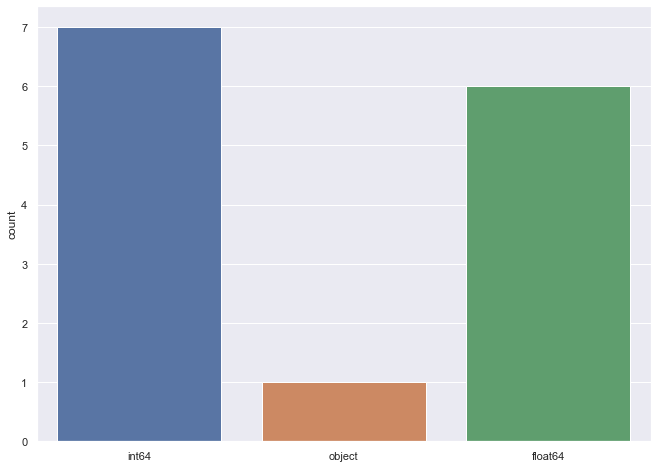

In [6]:
#setting figure szie
sns.set(rc={'figure.figsize':(11,8)})

#visualizing the count of data types of the fetaures
sns.countplot(loan_df.dtypes.map(str))

### Key Take-Aways

    1. There are 6 decimal features.
    2. There are 7 integer features.
    3. There is 1 categorical feature.
    4. There are 7 class in the categorical features.
    5. There are total of 9578 entries.

In [7]:
#checking the categorical feature
loan_df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

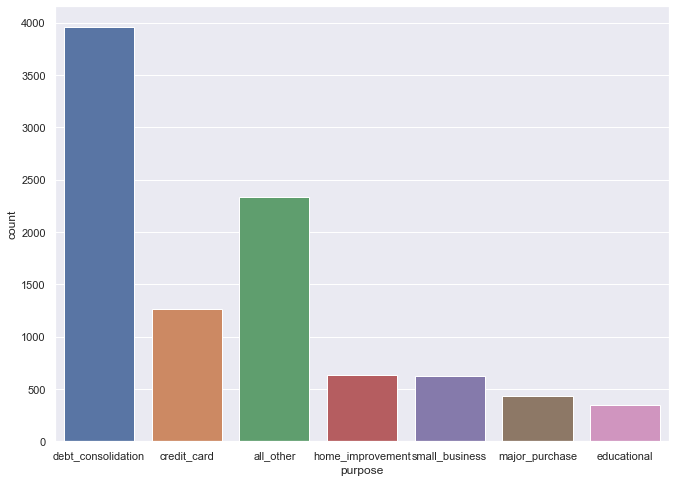

In [8]:
#setting figure szie
sns.set(rc={'figure.figsize':(11,8)})

#plt.figure(figsize=(16, 6))
sns.countplot(x="purpose",data=loan_df)

### Key Take-Aways

    1. Highest amount of purpose is for debt consolidation.
    2. Least amount of purpose is for educational.

In [9]:
#checking for null values
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
#checking the total number of null entries
loan_df.isnull().sum().sum()

0

### Key Take-Aways

    1. There are no null entries in the dataset.

### credit.policy:
1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

In [11]:
#displaying "credit.policy" feature values
loan_df[["credit.policy"]]

credit.policy
0                 1
1                 1
2                 1
3                 1
4                 1
...             ...
9573              0
9574              0
9575              0
9576              0
9577              0

[9578 rows x 1 columns]

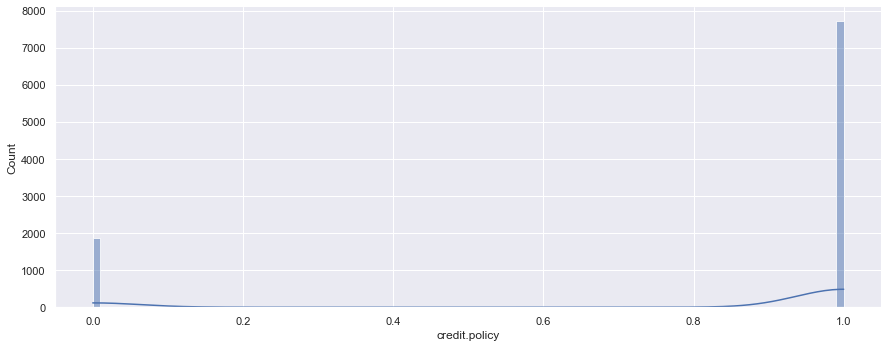

In [12]:
#checking the distribution of credit.policy
sns.displot(data=loan_df, kde=True, x="credit.policy", kind='hist', height=5, aspect=2.5, bins=100)

<AxesSubplot:xlabel='credit.policy', ylabel='count'>

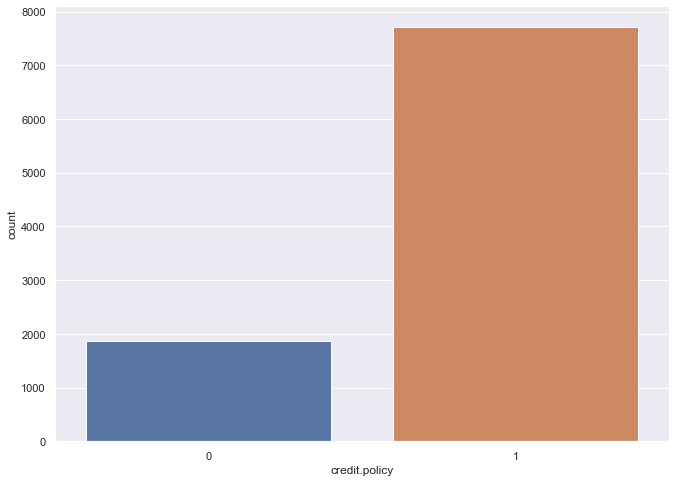

In [13]:
#visualizing the the count of credit.policy
sns.countplot(x="credit.policy",data=loan_df)

In [14]:
#checking the count of credit.policy
loan_df["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

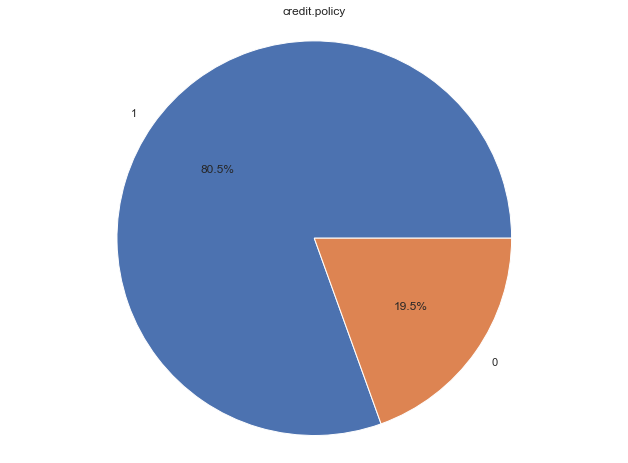

In [15]:
#visualizing the count distribution of credit.policy
my_labels = 'Tasks Pending','Tasks Ongoing','Tasks Completed'
plt.pie(loan_df["credit.policy"].value_counts(),labels=loan_df["credit.policy"].value_counts().index,autopct='%1.1f%%')
plt.title('credit.policy')
plt.axis('equal')
plt.show()

### Key Take-Aways

    1. "credit.policy" is a binary feature with "1" or "0"
    2. 80.5% i.e, Majority customer are meeting the credit underwriting criteria.
    3. 19.5% customers does not meet the criteria.

### purpose: 
The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

In [16]:
#displaying "purpose" feature values
loan_df[["purpose"]]

purpose
0     debt_consolidation
1            credit_card
2     debt_consolidation
3     debt_consolidation
4            credit_card
...                  ...
9573           all_other
9574           all_other
9575  debt_consolidation
9576    home_improvement
9577  debt_consolidation

[9578 rows x 1 columns]

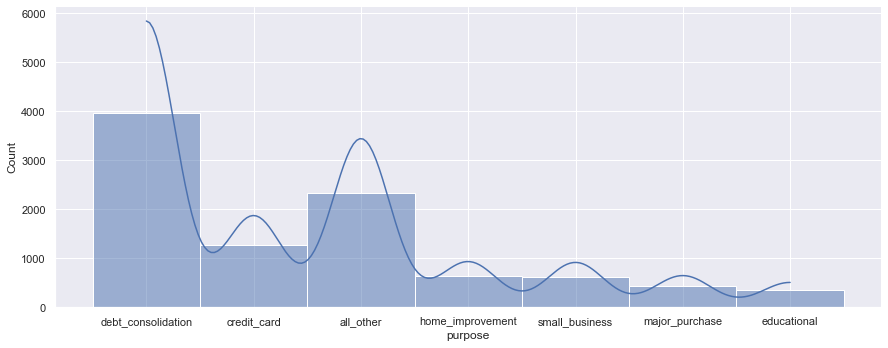

In [17]:
#checking the distribuion of purpose
sns.displot(data=loan_df, kde=True, x="purpose", kind='hist', height=5, aspect=2.5, bins=100)

<AxesSubplot:xlabel='purpose', ylabel='count'>

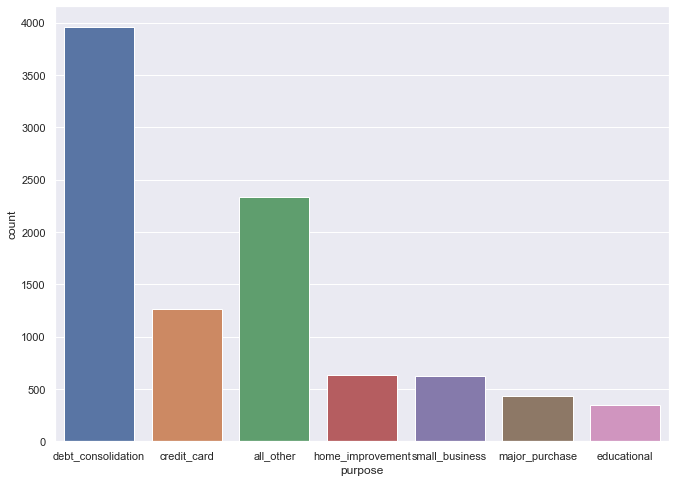

In [18]:
#visualizing the count distribution of purpose
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(x="purpose",data=loan_df)

In [19]:
#checking the count of purpose categories
loan_df["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

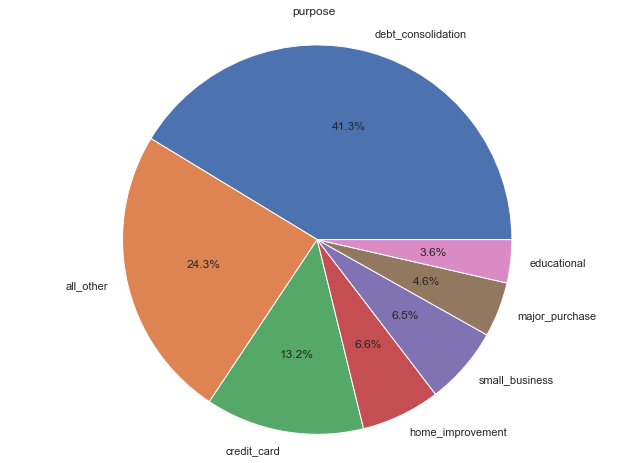

In [20]:
#visualizing the purpose category distribution
plt.pie(loan_df["purpose"].value_counts(),labels=loan_df["purpose"].value_counts().index,autopct='%1.1f%%')
plt.title('purpose')
plt.axis('equal')
plt.show()

### Key Take-Aways

    1. Majority purpose is represented as debt consolidation.
    2. Other reasons constitute second majority share.
    3. All other options hover around or less than 10% each.

### int.rate:
The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

In [21]:
#displaying "int.rate" feature values
loan_df[["int.rate"]]

int.rate
0       0.1189
1       0.1071
2       0.1357
3       0.1008
4       0.1426
...        ...
9573    0.1461
9574    0.1253
9575    0.1071
9576    0.1600
9577    0.1392

[9578 rows x 1 columns]

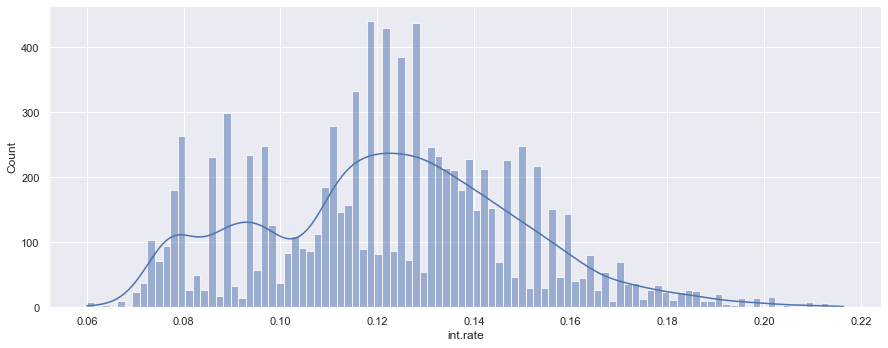

In [22]:
#checking the distribution of "int.rate" values
sns.displot(data=loan_df, kde=True, x="int.rate", kind='hist', height=5, aspect=2.5, bins=100)

In [23]:
#checking the statistics of 'int.rate' 
loan_df["int.rate"].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

In [24]:
#checking the median of 'int.rate' 
loan_df["int.rate"].median()

0.1221

In [25]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=0.103900

#75% value
Q3=0.140700

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 0.036799999999999986
Lower Limit= 0.04870000000000003
Upper Limit= 0.19589999999999996


In [26]:
#checking the number of customers having intrest rate more than 19.5%
(loan_df["int.rate"]>0.195).value_counts()

False    9527
True       51
Name: int.rate, dtype: int64

<AxesSubplot:xlabel='int.rate'>

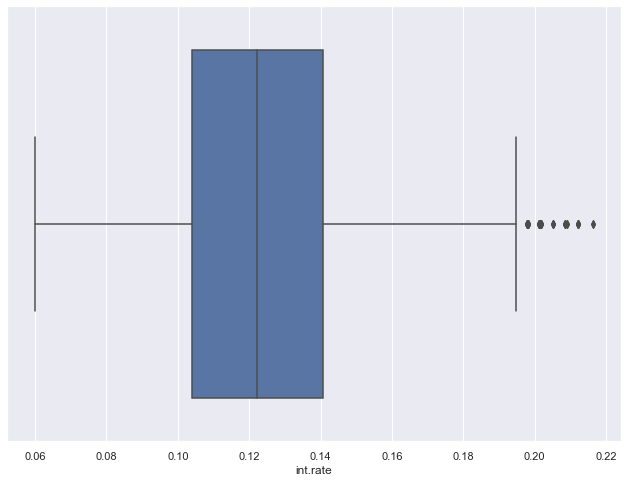

In [27]:
#visualizing the boxplot to see the outliers in the "int.rate"
sns.boxplot(loan_df["int.rate"])

<AxesSubplot:ylabel='int.rate'>

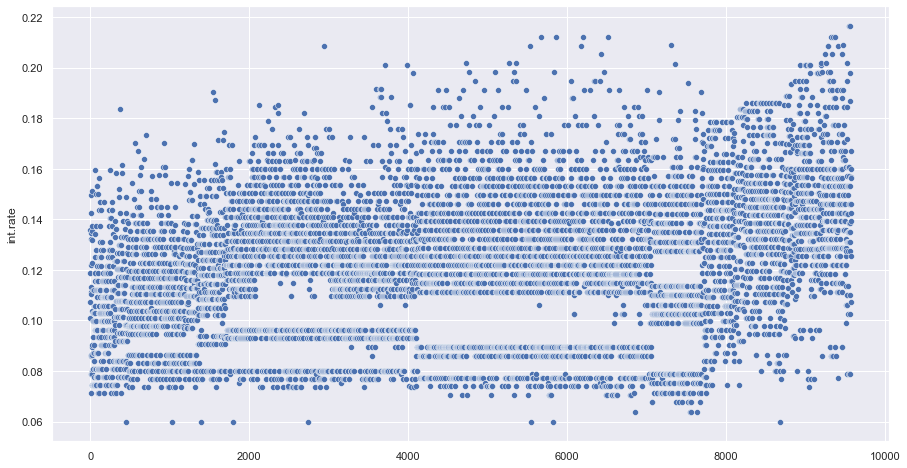

In [28]:
#vizualizing the distribution of "int.rate" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="int.rate", data=loan_df)

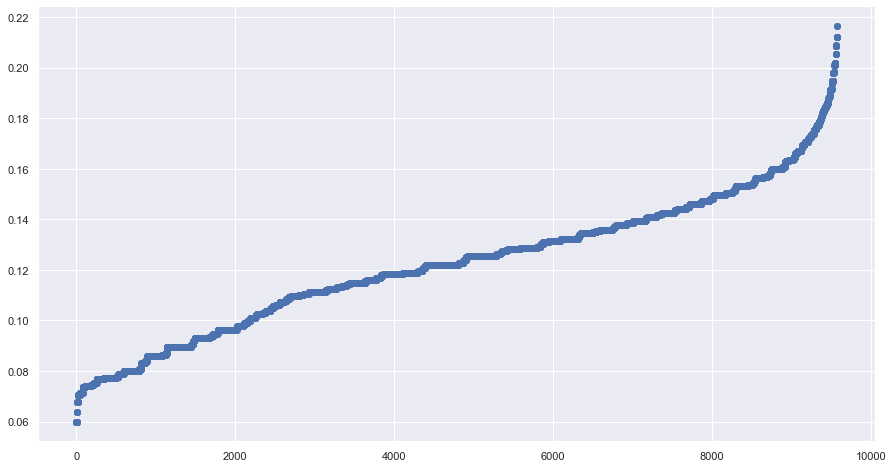

In [29]:
#vizualizing the distribution of "int.rate" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["int.rate"]))),np.sort(loan_df["int.rate"]))

### Key Take-Aways

    1. Customers with higher intrest rates are fewer in number as compared to others.
    2. There is lesser number of high risk customers.
    2. Majority of customers have intrest rates of 6% - 19.5%.
    3. There are 51 customers having intrest rates greater than 19.5%.

### installment:
The monthly installments owed by the borrower if the loan is funded.

In [30]:
#displaying "installment" feature values
loan_df[["installment"]]

installment
0          829.10
1          228.22
2          366.86
3          162.34
4          102.92
...           ...
9573       344.76
9574       257.70
9575        97.81
9576       351.58
9577       853.43

[9578 rows x 1 columns]

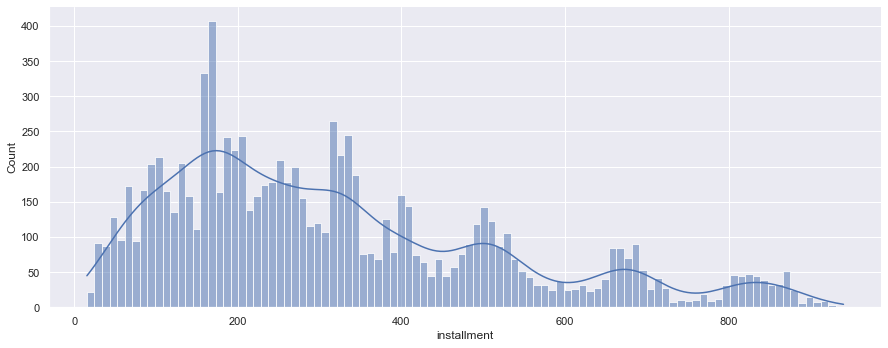

In [31]:
#checking the distribution of "installment" values
sns.displot(data=loan_df, kde=True, x="installment", kind='hist', height=5, aspect=2.5, bins=100)

In [32]:
#checking the statistics of 'installment' 
loan_df["installment"].describe()

count    9578.000000
mean      319.089413
std       207.071301
min        15.670000
25%       163.770000
50%       268.950000
75%       432.762500
max       940.140000
Name: installment, dtype: float64

In [33]:
#checking the median of 'installment' 
loan_df["installment"].median()

268.95

In [34]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=163.77

#75% value
Q3=432.7625

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 268.99249999999995
Lower Limit= -239.71874999999991
Upper Limit= 836.2512499999999


In [35]:
#checking the number of customers having installment amount more than 836.25
(loan_df["installment"]>836.25).value_counts()

False    9342
True      236
Name: installment, dtype: int64

<AxesSubplot:xlabel='installment'>

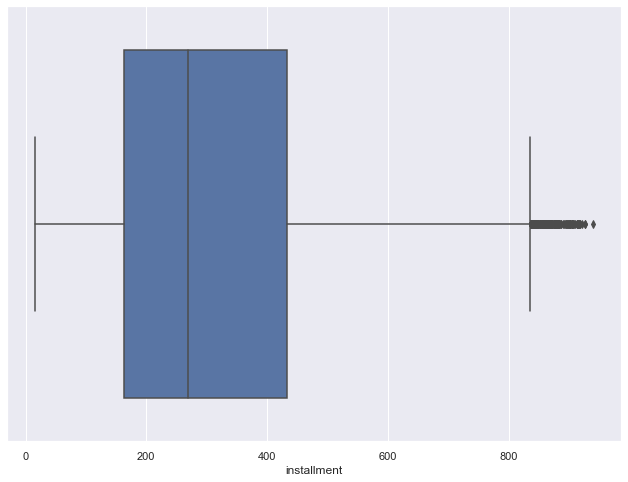

In [36]:
#visualizing the boxplot to see the outliers in the "installment"
sns.boxplot(loan_df["installment"])

<AxesSubplot:ylabel='installment'>

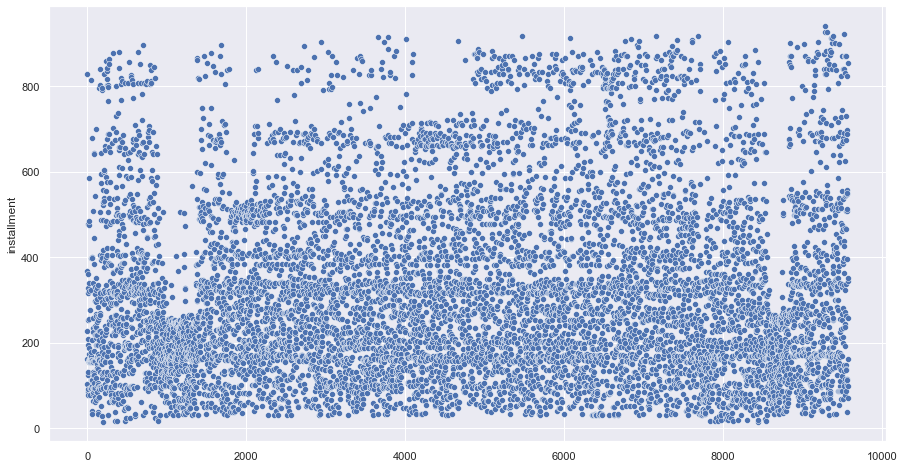

In [37]:
#vizualizing the distribution of "installment" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="installment", data=loan_df)

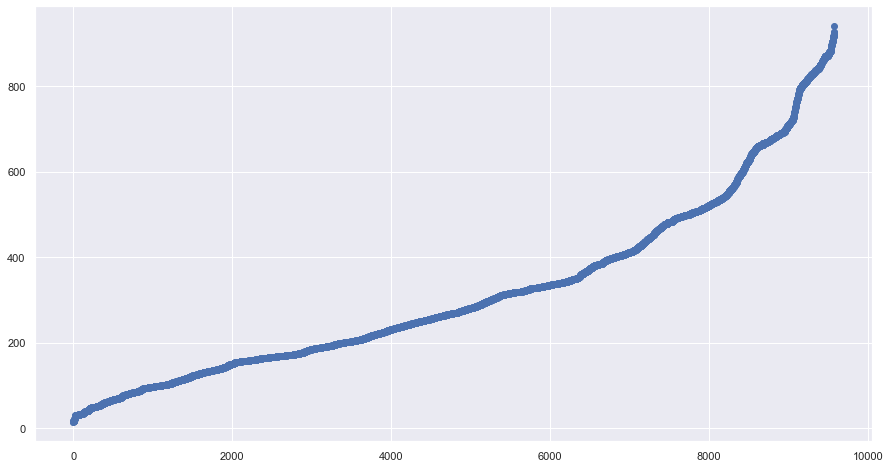

In [38]:
#vizualizing the distribution of "installment" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["installment"]))),np.sort(loan_df["installment"]))

### Key Take-Aways

    1. The Max installment paid by a customer is = 940.14.
    2. The Min installment paid by a customer is = 15.67.
    2. There are 236 customers are paying installment above 836.25.

### log.annual.inc:
The natural log of the self-reported annual income of the borrower.

In [39]:
#displaying "log.annual.inc" feature values
loan_df[["log.annual.inc"]]

log.annual.inc
0          11.350407
1          11.082143
2          10.373491
3          11.350407
4          11.299732
...              ...
9573       12.180755
9574       11.141862
9575       10.596635
9576       10.819778
9577       11.264464

[9578 rows x 1 columns]

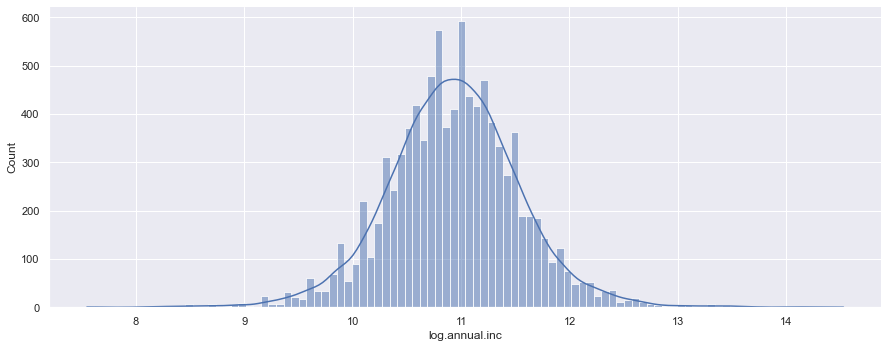

In [40]:
#checking the distribution of "log.annual.inc" values
sns.displot(data=loan_df, kde=True, x="log.annual.inc", kind='hist', height=5, aspect=2.5, bins=100)

In [41]:
#checking the statistics of 'log.annual.inc' 
loan_df["log.annual.inc"].describe()

count    9578.000000
mean       10.932117
std         0.614813
min         7.547502
25%        10.558414
50%        10.928884
75%        11.291293
max        14.528354
Name: log.annual.inc, dtype: float64

In [42]:
#checking the median of 'log.annual.inc' 
loan_df["log.annual.inc"].median()

10.92888357

In [43]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["log.annual.inc"].describe()["25%"]

#75% value
Q3=loan_df["log.annual.inc"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 0.7328793975000014
Lower Limit= 9.459094423749999
Upper Limit= 12.390612013750005


In [44]:
#checking the number of customers having log.annual.inc more than upr_lim
(loan_df["log.annual.inc"]>upr_lim).value_counts()

False    9457
True      121
Name: log.annual.inc, dtype: int64

In [45]:
#checking the number of customers having log.annual.inc more than lwr_lim
(loan_df["log.annual.inc"]<lwr_lim).value_counts()

False    9461
True      117
Name: log.annual.inc, dtype: int64

<AxesSubplot:xlabel='log.annual.inc'>

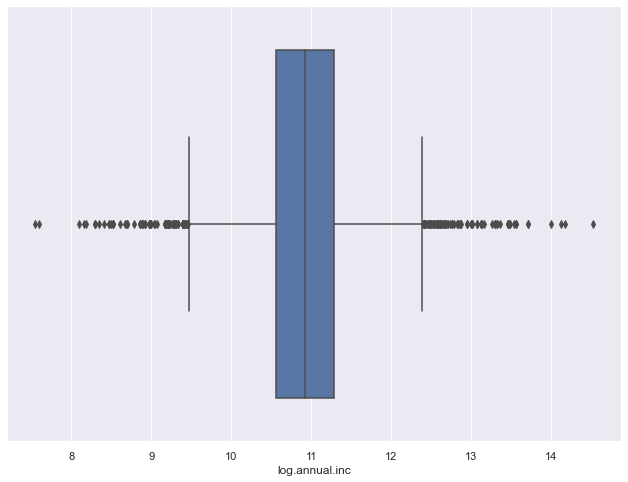

In [46]:
#visualizing the boxplot to see the outliers in the "log.annual.inc"
sns.boxplot(loan_df["log.annual.inc"])

<AxesSubplot:ylabel='log.annual.inc'>

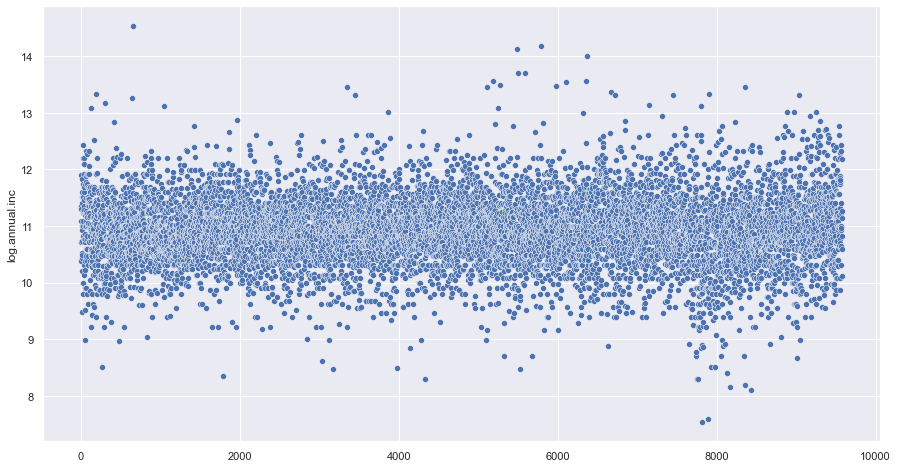

In [47]:
#vizualizing the distribution of "log.annual.inc" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="log.annual.inc", data=loan_df)

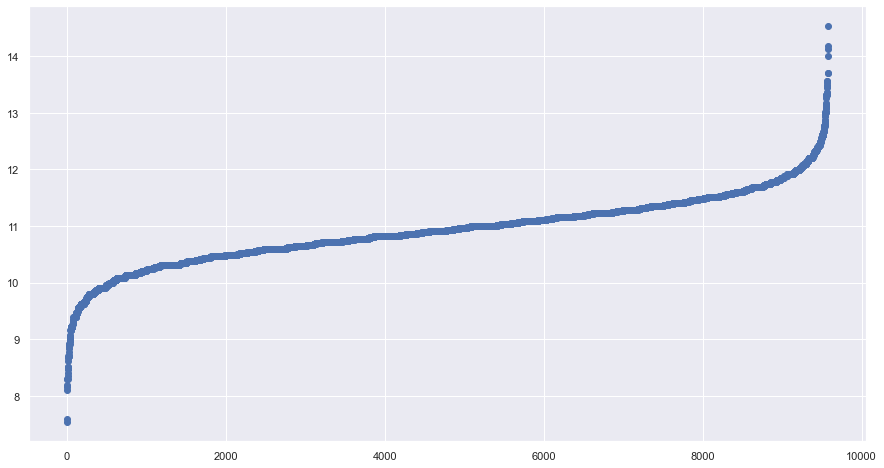

In [48]:
#vizualizing the distribution of "log.annual.inc" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["log.annual.inc"]))),np.sort(loan_df["log.annual.inc"]))

### Key Take-Aways

    1. The log.annual.inc follows the standard distribution.
    2. Lower Limit= 9.459094423749999.
    3. Upper Limit= 12.390612013750005.

### dti:
The debt-to-income ratio of the borrower (amount of debt divided by annual income).

In [49]:
#displaying "dti" feature values
loan_df[["dti"]]

dti
0     19.48
1     14.29
2     11.63
3      8.10
4     14.97
...     ...
9573  10.39
9574   0.21
9575  13.09
9576  19.18
9577  16.28

[9578 rows x 1 columns]

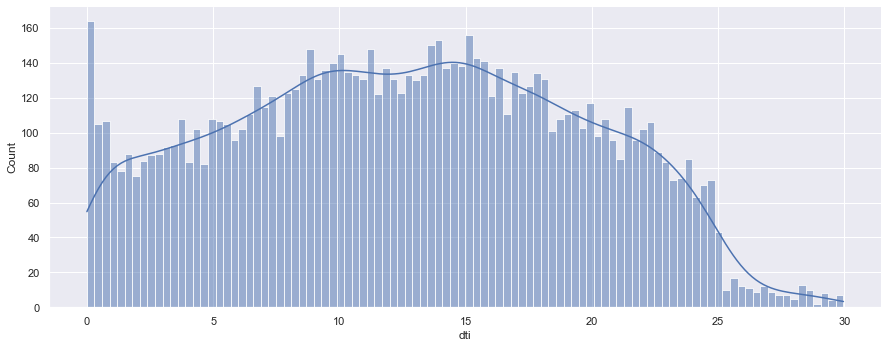

In [50]:
#checking the distribution of "dti" values
sns.displot(data=loan_df, kde=True, x="dti", kind='hist', height=5, aspect=2.5, bins=100)

In [51]:
#checking the statistics of 'dti' 
loan_df["dti"].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [52]:
#checking the median of 'dti' 
loan_df["dti"].median()

12.665

In [53]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["dti"].describe()["25%"]

#75% value
Q3=loan_df["dti"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 10.7375
Lower Limit= -8.893750000000004
Upper Limit= 34.056250000000006


In [54]:
#checking the number of customers having dti more than upr_lim
(loan_df["dti"]==0.0).value_counts()

False    9489
True       89
Name: dti, dtype: int64

<AxesSubplot:xlabel='dti'>

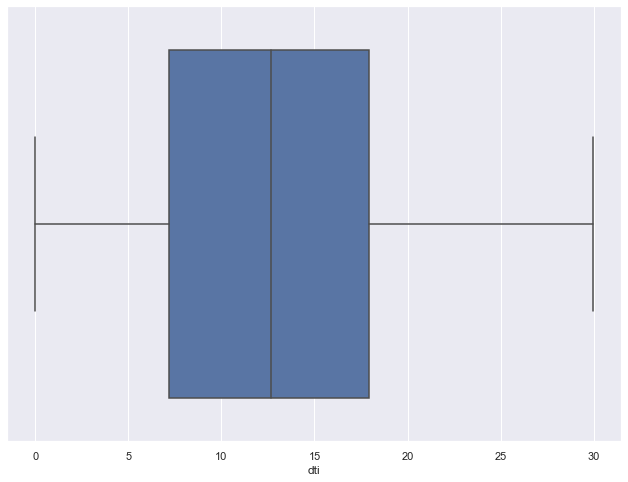

In [55]:
#visualizing the boxplot to see the outliers in the "dti"
sns.boxplot(loan_df["dti"])

<AxesSubplot:ylabel='dti'>

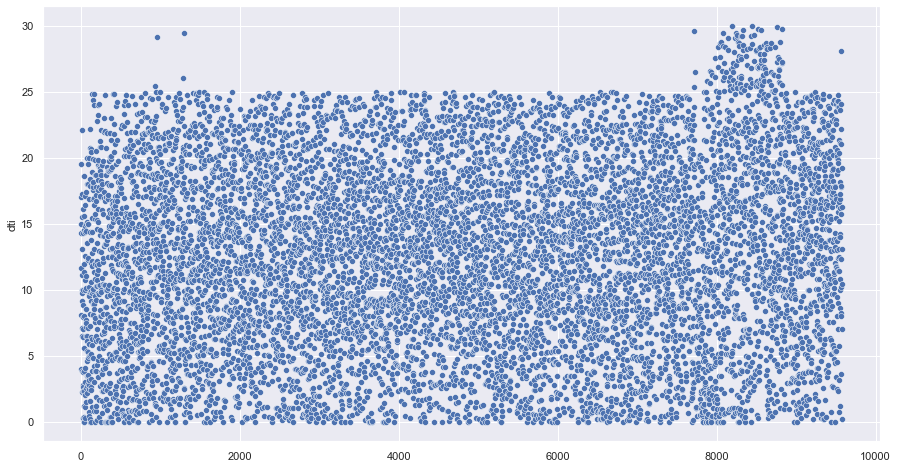

In [56]:
#vizualizing the distribution of "dti" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="dti", data=loan_df)

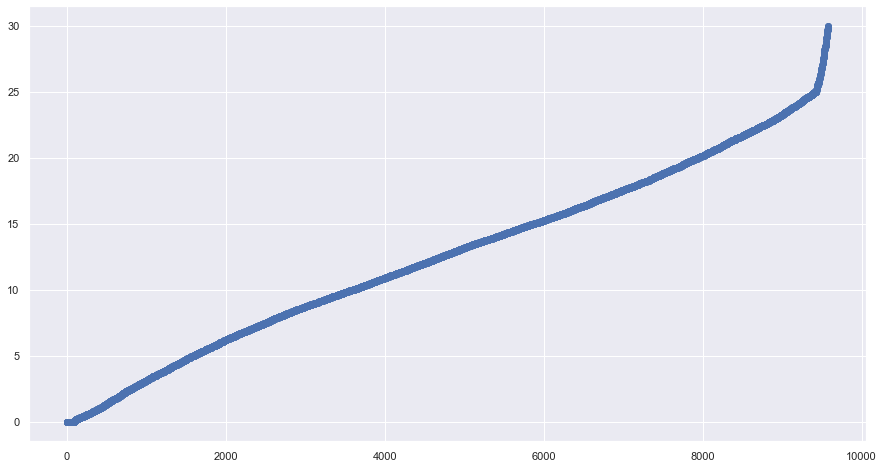

In [57]:
#vizualizing the distribution of "dti" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["dti"]))),np.sort(loan_df["dti"]))

### Key Take-Aways

    1. There are no outliers in dti.
    2. The Min dti is = 0.0.
    3. The Max dti is = 29.96.
    4. dti=0 means customers having zero debt.
    5. 89 customers are having zero debt.

### fico: 
The FICO credit score of the borrower.

In [58]:
#displaying "fico" feature values
loan_df[["fico"]]

fico
0      737
1      707
2      682
3      712
4      667
...    ...
9573   672
9574   722
9575   687
9576   692
9577   732

[9578 rows x 1 columns]

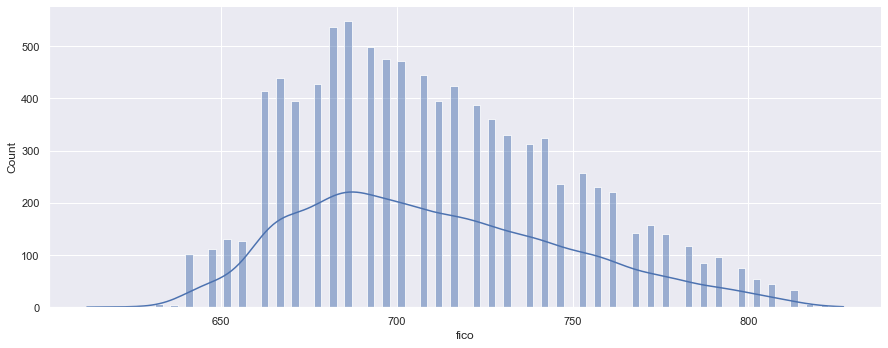

In [59]:
#checking the distribution of "fico" values
sns.displot(data=loan_df, kde=True, x="fico", kind='hist', height=5, aspect=2.5, bins=100)

In [60]:
#checking the statistics of 'fico' 
loan_df["fico"].describe()

count    9578.000000
mean      710.846314
std        37.970537
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max       827.000000
Name: fico, dtype: float64

In [61]:
#checking the median of 'fico' 
loan_df["fico"].median()

707.0

In [62]:
#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["fico"].describe()["25%"]

#75% value
Q3=loan_df["fico"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

Inter Quartile range= 55.0
Lower Limit= 599.5
Upper Limit= 819.5


In [63]:
#checking the number of customers having fico more than upr_lim
(loan_df["fico"]>upr_lim).value_counts()

False    9572
True        6
Name: fico, dtype: int64

<AxesSubplot:xlabel='fico'>

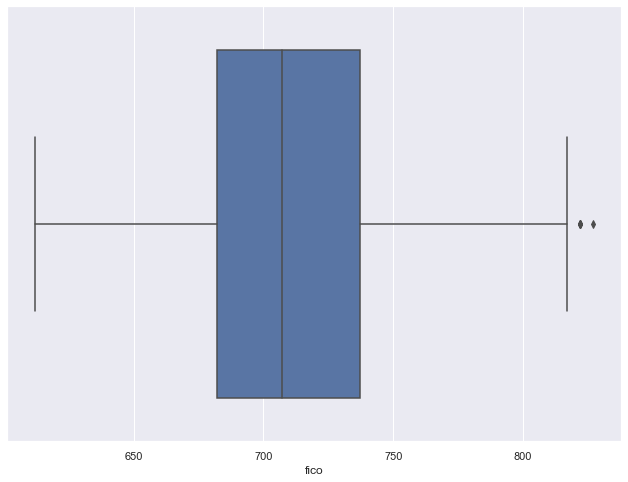

In [64]:
#visualizing the boxplot to see the outliers in the "fico"
sns.boxplot(loan_df["fico"])

<AxesSubplot:ylabel='fico'>

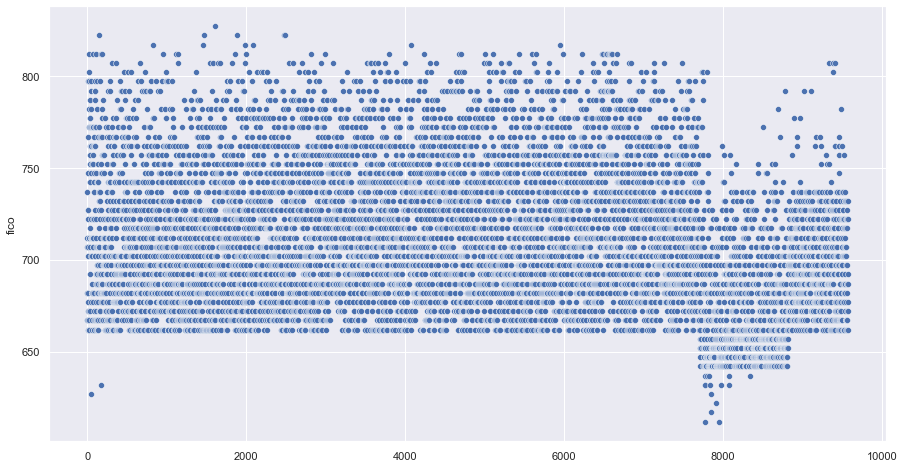

In [65]:
#vizualizing the distribution of "fico" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="fico", data=loan_df)

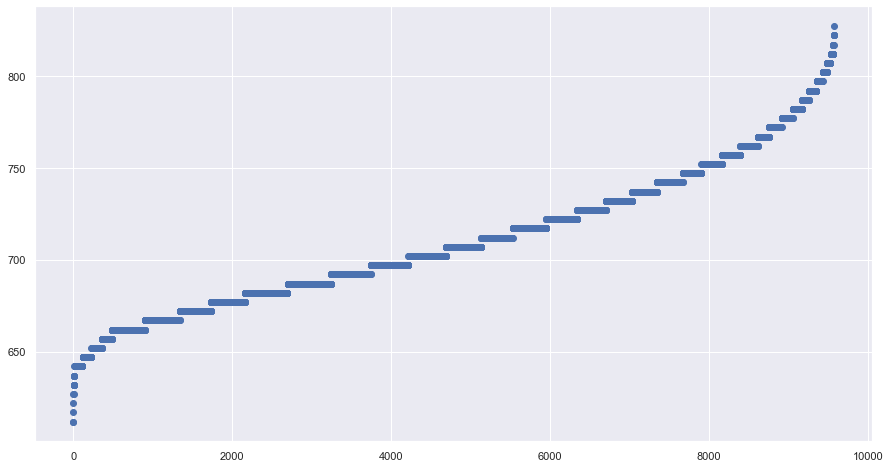

In [66]:
#vizualizing the distribution of "fico" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["fico"]))),np.sort(loan_df["fico"]))

In [67]:
#displaying "fico" feature values
sorted_uniq=sorted(loan_df["fico"].unique())
print("unique values:")
print(sorted_uniq)

uniq_len=len(loan_df["fico"].unique())
print()
print("Number of uniques elements:")
print(uniq_len)

#checking the difference of unique fico score
diff_list=[]
for i in range(0,uniq_len-1):
    diff_list.append(sorted(loan_df["fico"].unique())[i+1] - sorted(loan_df["fico"].unique())[i])
    
diff_series=pd.Series(diff_list)
print()
print("Unique difference values:")
print(diff_series.unique())

unique values:
[612, 617, 622, 627, 632, 637, 642, 647, 652, 657, 662, 667, 672, 677, 682, 687, 692, 697, 702, 707, 712, 717, 722, 727, 732, 737, 742, 747, 752, 757, 762, 767, 772, 777, 782, 787, 792, 797, 802, 807, 812, 817, 822, 827]

Number of uniques elements:
44

Unique difference values:
[5]


### Key Take-Aways

    1. The Max FICO credit score of a customer is = 827.0.
    2. The Min FICO credit score of a customer is = 612.0.
    3. There are 6 customers having FICO credit score of above 819.5.
    4. FICO credit score is given to the customers with blabs of interval = 5. e.g., 612,617, 622

### days.with.cr.line:
The number of days the borrower has had a credit line.

DATA:
      days.with.cr.line
0           5639.958333
1           2760.000000
2           4710.000000
3           2699.958333
4           4066.000000
...                 ...
9573       10474.000000
9574        4380.000000
9575        3450.041667
9576        1800.000000
9577        4740.000000

[9578 rows x 1 columns]
Feature Statistics:
count     9578.000000
mean      4560.767197
std       2496.930377
min        178.958333
25%       2820.000000
50%       4139.958333
75%       5730.000000
max      17639.958330
Name: days.with.cr.line, dtype: float64

Feature Median:
4139.958333

Inter Quartile range= 2910.0
Lower Limit= -1545.0
Upper Limit= 10095.0

Number of customers above upperlimit:


False    9232
True      346
Name: days.with.cr.line, dtype: int64

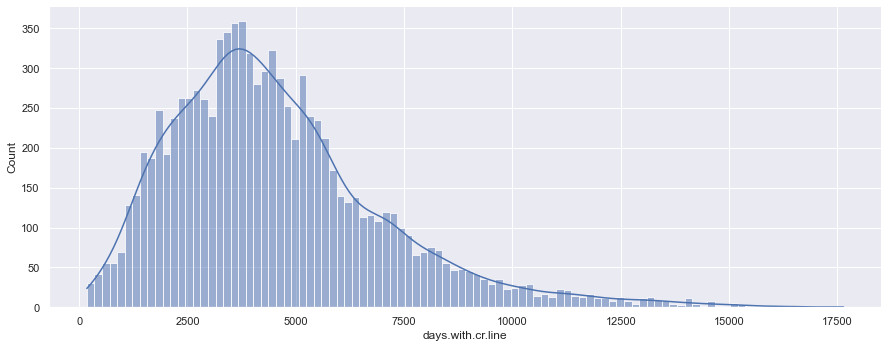

In [68]:
#displaying "days.with.cr.line" feature values
print("DATA:")
print(loan_df[["days.with.cr.line"]])

#checking the distribution of "days.with.cr.line" values
sns.displot(data=loan_df, kde=True, x="days.with.cr.line", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'days.with.cr.line' 
print("Feature Statistics:")
print(loan_df["days.with.cr.line"].describe())

#checking the median of 'days.with.cr.line' 
print()
print("Feature Median:")
print(loan_df["days.with.cr.line"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["days.with.cr.line"].describe()["25%"]

#75% value
Q3=loan_df["days.with.cr.line"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

#checking the number of customers having days.with.cr.line more than upr_lim
print()
print("Number of customers above upperlimit:")
(loan_df["days.with.cr.line"]>upr_lim).value_counts()

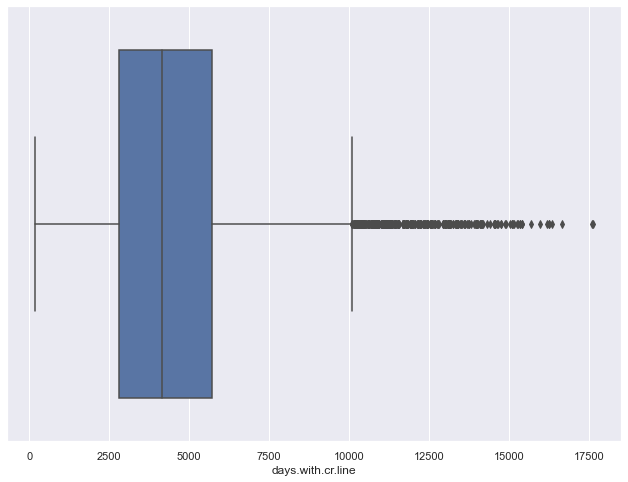

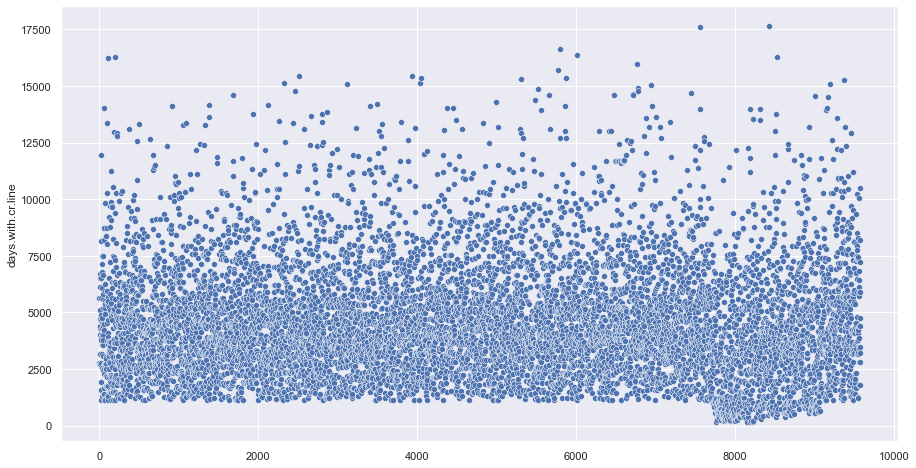

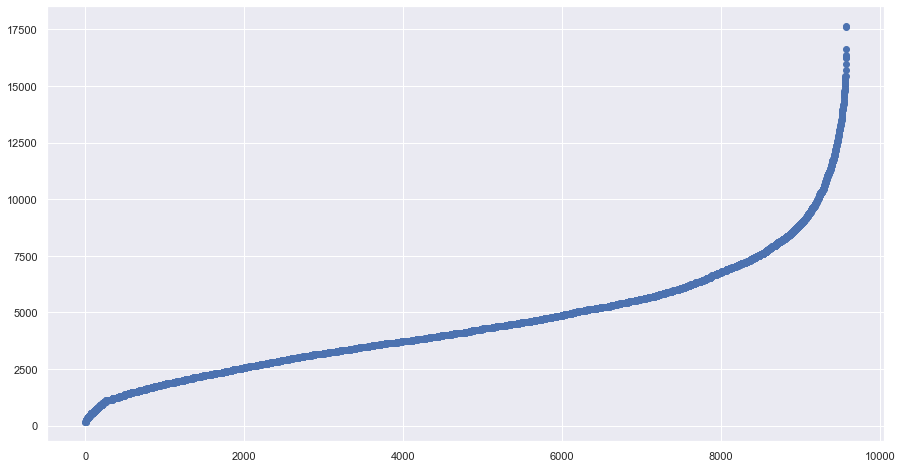

In [69]:
#visualizing the boxplot to see the outliers in the "days.with.cr.line"
sns.boxplot(loan_df["days.with.cr.line"])

#vizualizing the distribution of "days.with.cr.line" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="days.with.cr.line", data=loan_df)

#vizualizing the distribution of "days.with.cr.line" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["days.with.cr.line"]))),np.sort(loan_df["days.with.cr.line"]))

### Key Take-Aways

    1. The Max days.with.cr.line of a customer is = 17639.95.
    2. The Min days.with.cr.line of a customer is = 178.95.
    3. There are 346 customers having FICO credit score of above 10095.0.

### revol.bal:
The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

DATA:
      revol.bal
0         28854
1         33623
2          3511
3         33667
4          4740
...         ...
9573     215372
9574        184
9575      10036
9576          0
9577      37879

[9578 rows x 1 columns]
Feature Statistics:
count    9.578000e+03
mean     1.691396e+04
std      3.375619e+04
min      0.000000e+00
25%      3.187000e+03
50%      8.596000e+03
75%      1.824950e+04
max      1.207359e+06
Name: revol.bal, dtype: float64

Feature Median:
8596.0

Inter Quartile range= 15062.5
Lower Limit= -19406.75
Upper Limit= 40843.25

Number of customers above upperlimit:
False    8798
True      780
Name: revol.bal, dtype: int64


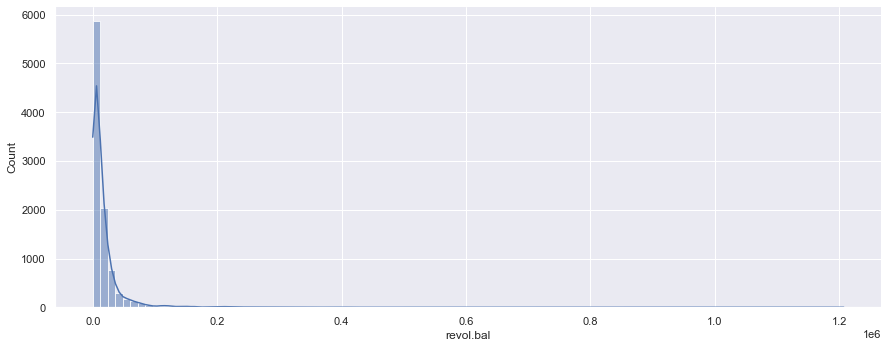

In [70]:
#displaying "revol.bal" feature values
print("DATA:")
print(loan_df[["revol.bal"]])

#checking the distribution of "revol.bal" values
sns.displot(data=loan_df, kde=True, x="revol.bal", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'revol.bal' 
print("Feature Statistics:")
print(loan_df["revol.bal"].describe())

#checking the median of 'revol.bal' 
print()
print("Feature Median:")
print(loan_df["revol.bal"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["revol.bal"].describe()["25%"]

#75% value
Q3=loan_df["revol.bal"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

#checking the number of customers having revol.bal more than upr_lim
print()
print("Number of customers above upperlimit:")
print((loan_df["revol.bal"]>upr_lim).value_counts())

In [71]:
#checking the percentage of data under upperlimit
8798/9578*100

91.8563374399666

In [72]:
print()
print("Number of customers with zero revol.bal:")
(loan_df["revol.bal"]==0).value_counts()


Number of customers with zero revol.bal:


False    9257
True      321
Name: revol.bal, dtype: int64

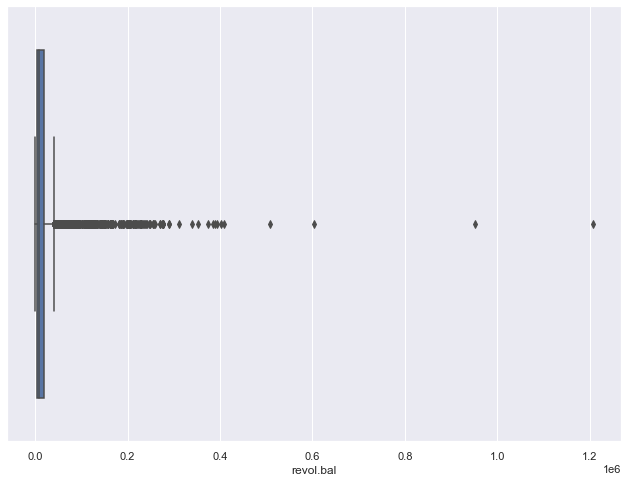

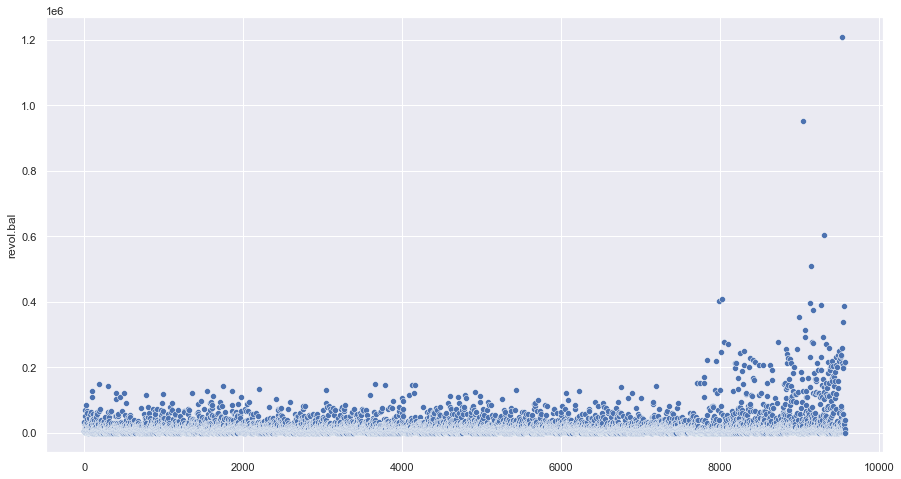

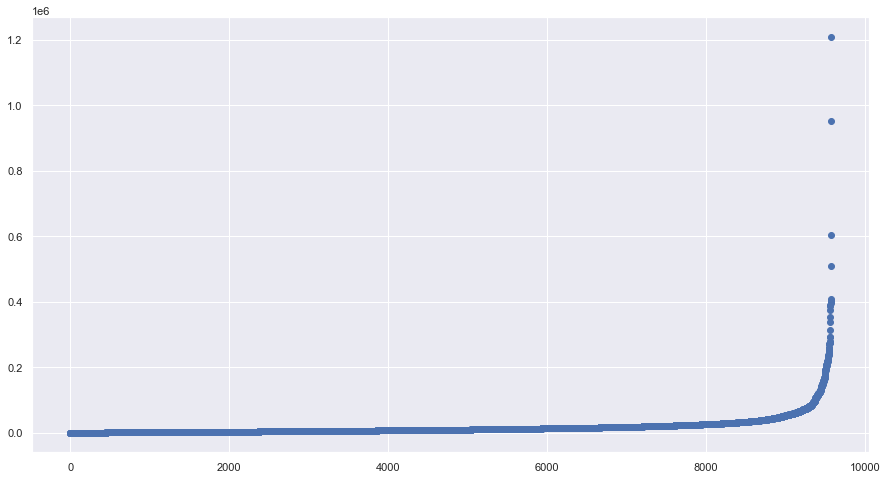

In [73]:
#visualizing the boxplot to see the outliers in the "revol.bal"
sns.boxplot(loan_df["revol.bal"])

#vizualizing the distribution of "revol.bal" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="revol.bal", data=loan_df)

#vizualizing the distribution of "revol.bal" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["revol.bal"]))),np.sort(loan_df["revol.bal"]))

### Key Take-Aways

    1. The Max revolving balance of a customer is = 1207359.
    2. The Min revolving balance of a customer is = 0.
    3. There are 321 customers having zero (0) revolving balance.
    2. 91.85% of customers are having revolving balance under 40843.25.

### revol.util:
The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

DATA:
      revol.util
0           52.1
1           76.7
2           25.6
3           73.2
4           39.5
...          ...
9573        82.1
9574         1.1
9575        82.9
9576         3.2
9577        57.0

[9578 rows x 1 columns]
Feature Statistics:
count    9578.000000
mean       46.799236
std        29.014417
min         0.000000
25%        22.600000
50%        46.300000
75%        70.900000
max       119.000000
Name: revol.util, dtype: float64

Feature Median:
46.3

Inter Quartile range= 48.300000000000004
Lower Limit= -49.85
Upper Limit= 143.35000000000002


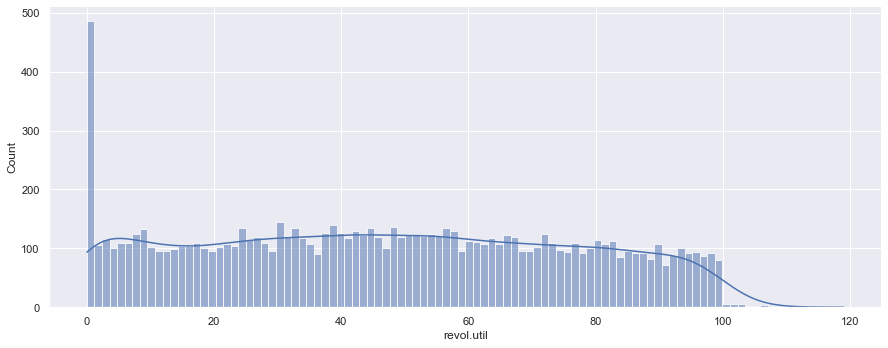

In [74]:
#displaying "revol.util" feature values
print("DATA:")
print(loan_df[["revol.util"]])

#checking the distribution of "revol.util" values
sns.displot(data=loan_df, kde=True, x="revol.util", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'revol.util' 
print("Feature Statistics:")
print(loan_df["revol.util"].describe())

#checking the median of 'revol.util' 
print()
print("Feature Median:")
print(loan_df["revol.util"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["revol.util"].describe()["25%"]

#75% value
Q3=loan_df["revol.util"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)


In [75]:
#checking the number of customers having revol.util more than upr_lim
print("Number of customers having revol.util above 100%:")
print((loan_df["revol.util"]>=100).value_counts())

Number of customers having revol.util above 100%:
False    9549
True       29
Name: revol.util, dtype: int64


In [76]:
#percentage of customers having revol.util less than 100%
9549/9578*100

99.69722280225517

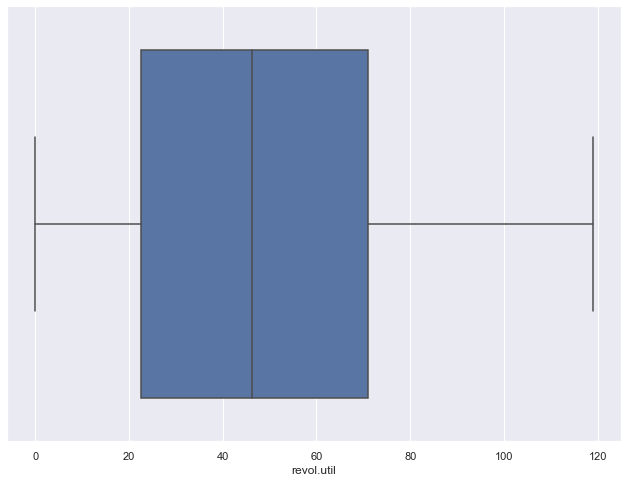

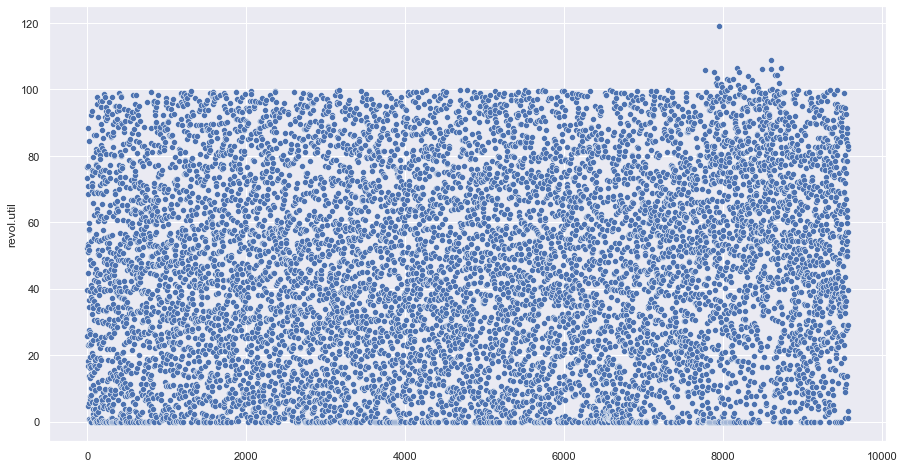

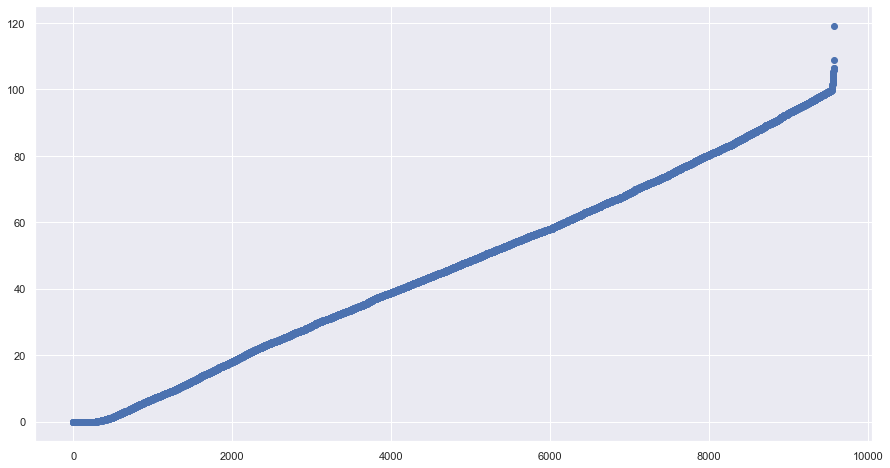

In [77]:
#visualizing the boxplot to see the outliers in the "revol.util"
sns.boxplot(loan_df["revol.util"])

#vizualizing the distribution of "revol.bal" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="revol.util", data=loan_df)

#vizualizing the distribution of "revol.util" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["revol.util"]))),np.sort(loan_df["revol.util"]))

### Key Take-Aways

    1. There are 29 customers having revol.util above 100%, i.e., debt is greater than avaialble balance.
    2. 99.69% custoemrs have revol.util less than 100%.
    3. revol.util has almost equal distribution among the customers as 46.3% median value.

### inq.last.6mths:
The borrower's number of inquiries by creditors in the last 6 months.

DATA:
      inq.last.6mths
0                  0
1                  0
2                  1
3                  1
4                  0
...              ...
9573               2
9574               5
9575               8
9576               5
9577               6

[9578 rows x 1 columns]
Feature Statistics:
count    9578.000000
mean        1.577469
std         2.200245
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: inq.last.6mths, dtype: float64

Feature Median:
1.0

Inter Quartile range= 2.0
Lower Limit= -3.0
Upper Limit= 5.0


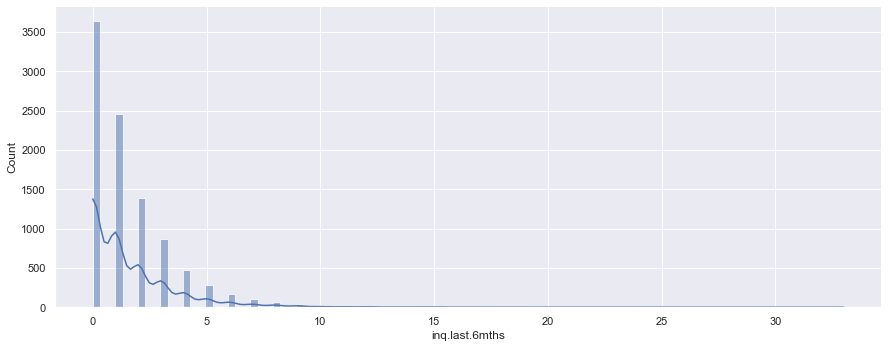

In [78]:
#displaying "inq.last.6mths" feature values
print("DATA:")
print(loan_df[["inq.last.6mths"]])

#checking the distribution of "inq.last.6mths" values
sns.displot(data=loan_df, kde=True, x="inq.last.6mths", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'inq.last.6mths' 
print("Feature Statistics:")
print(loan_df["inq.last.6mths"].describe())

#checking the median of 'inq.last.6mths' 
print()
print("Feature Median:")
print(loan_df["inq.last.6mths"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["inq.last.6mths"].describe()["25%"]

#75% value
Q3=loan_df["inq.last.6mths"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

In [79]:
#checking the number of customers having inq.last.6mths more than upr_lim
print("Number of customers having inq.last.6mths above 5:")
print((loan_df["inq.last.6mths"]>=5).value_counts())

Number of customers having inq.last.6mths above 5:
False    8822
True      756
Name: inq.last.6mths, dtype: int64


In [80]:
#percentage of customers having inq.last.6mths less than 5
8822/9578*100

92.10691167258301

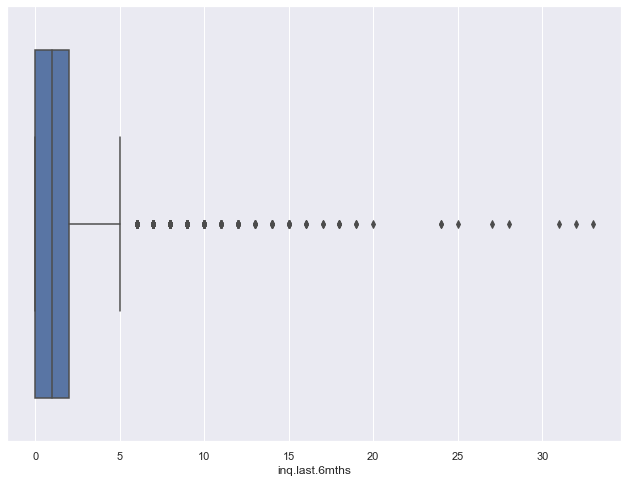

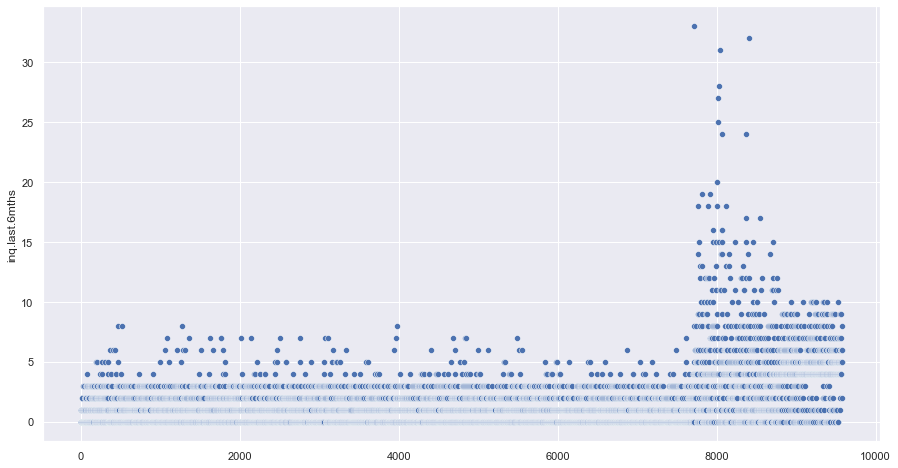

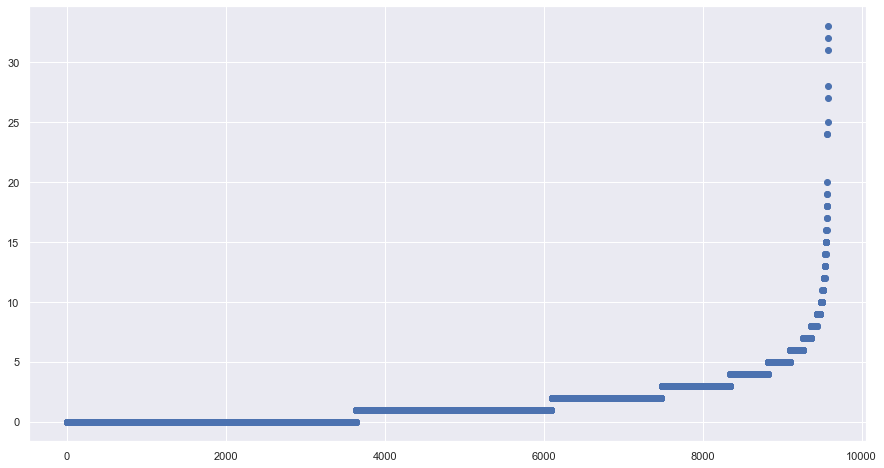

In [81]:
#visualizing the boxplot to see the outliers in the "inq.last.6mths"
sns.boxplot(loan_df["inq.last.6mths"])

#vizualizing the distribution of "inq.last.6mths" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="inq.last.6mths", data=loan_df)

#vizualizing the distribution of "inq.last.6mths" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["inq.last.6mths"]))),np.sort(loan_df["inq.last.6mths"]))

In [82]:
#displaying "inq.last.6mths" feature values
sorted_uniq=sorted(loan_df["inq.last.6mths"].unique())
print("unique values:")
print(sorted_uniq)

uniq_len=len(loan_df["inq.last.6mths"].unique())
print()
print("Number of uniques elements:")
print(uniq_len)

#checking the difference of unique inq.last.6mths score
diff_list=[]
for i in range(0,uniq_len-1):
    diff_list.append(sorted(loan_df["inq.last.6mths"].unique())[i+1] - sorted(loan_df["inq.last.6mths"].unique())[i])
    
diff_series=pd.Series(diff_list)
print()
print("Unique difference values:")
print(diff_series.unique())

unique values:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28, 31, 32, 33]

Number of uniques elements:
28

Unique difference values:
[1 4 2 3]


### Key Take-Aways

    1. Median value of inquiries is 1.
    2. Min number of inquiries in 0.
    3. Maximum number of inquiries in 33.
    4. 92.1% customers got less than 5 inquiries in last 6 months.

### delinq.2yrs:
The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

DATA:
      delinq.2yrs
0               0
1               0
2               0
3               0
4               1
...           ...
9573            0
9574            0
9575            0
9576            0
9577            0

[9578 rows x 1 columns]
Feature Statistics:
count    9578.000000
mean        0.163708
std         0.546215
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: delinq.2yrs, dtype: float64

Feature Median:
0.0

Inter Quartile range= 0.0
Lower Limit= 0.0
Upper Limit= 0.0


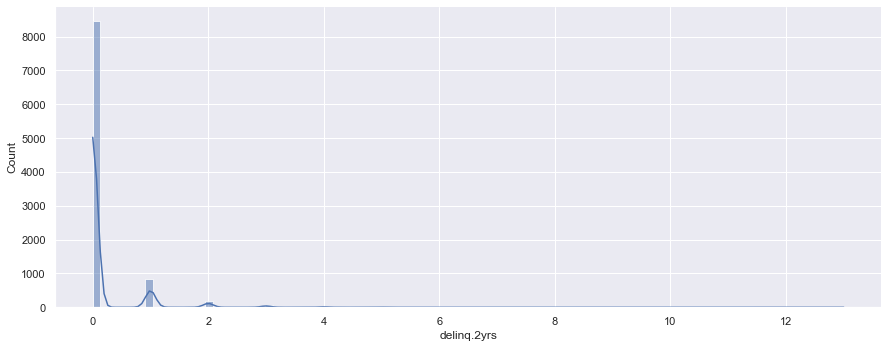

In [83]:
#displaying "delinq.2yrs" feature values
print("DATA:")
print(loan_df[["delinq.2yrs"]])

#checking the distribution of "delinq.2yrs" values
sns.displot(data=loan_df, kde=True, x="delinq.2yrs", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'delinq.2yrs' 
print("Feature Statistics:")
print(loan_df["delinq.2yrs"].describe())

#checking the median of 'delinq.2yrs' 
print()
print("Feature Median:")
print(loan_df["delinq.2yrs"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["delinq.2yrs"].describe()["25%"]

#75% value
Q3=loan_df["delinq.2yrs"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

In [84]:
#checking the number of customers having delinq.2yrs more than upr_lim
print("Number of customers having delinq.2yrs equal to 0:")
print((loan_df["delinq.2yrs"]==0).value_counts())

Number of customers having delinq.2yrs equal to 0:
True     8458
False    1120
Name: delinq.2yrs, dtype: int64


In [85]:
#percentage of customers having delinq.2yrs equal to 0
8458/9578*100

88.30653581123407

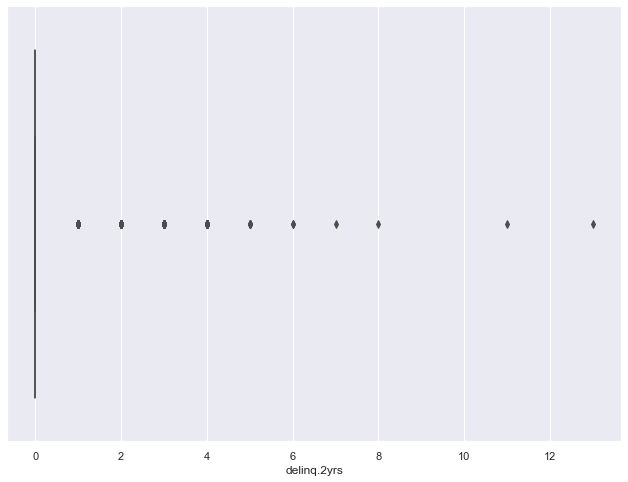

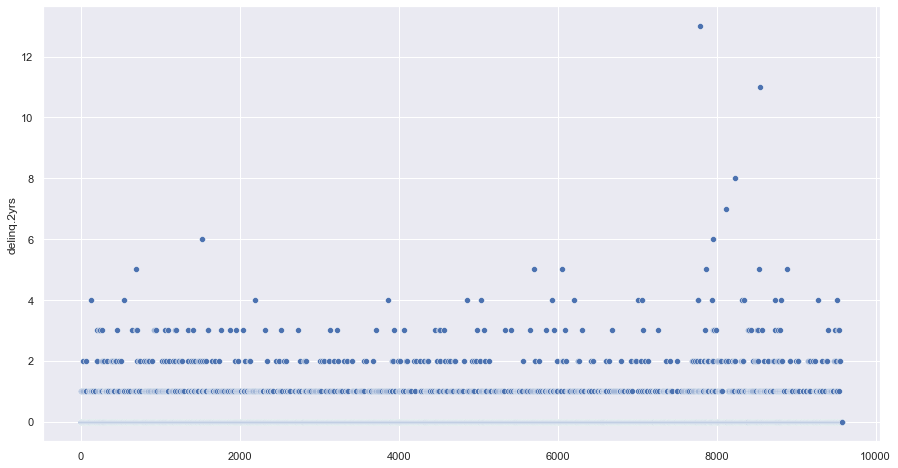

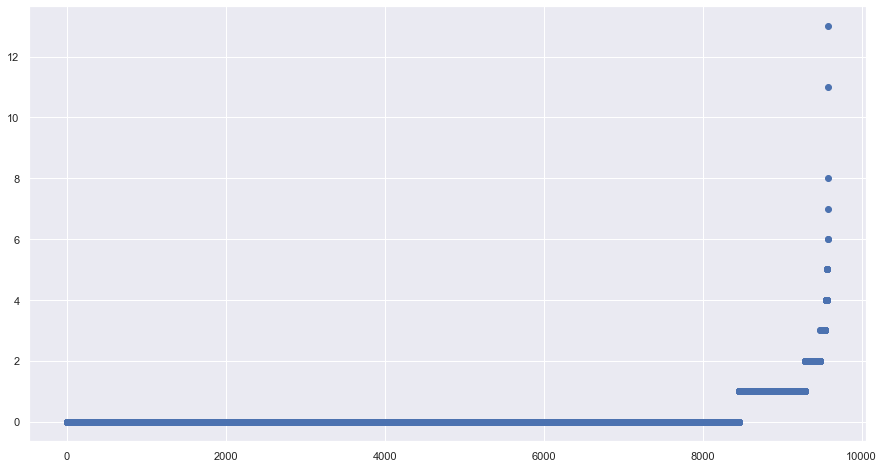

In [86]:
#visualizing the boxplot to see the outliers in the "delinq.2yrs"
sns.boxplot(loan_df["delinq.2yrs"])

#vizualizing the distribution of "delinq.2yrs" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="delinq.2yrs", data=loan_df)

#vizualizing the distribution of "delinq.2yrs" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["delinq.2yrs"]))),np.sort(loan_df["delinq.2yrs"]))

In [87]:
#displaying "delinq.2yrs" feature values
sorted_uniq=sorted(loan_df["delinq.2yrs"].unique())
print("unique values")
print(sorted_uniq)

uniq_len=len(loan_df["delinq.2yrs"].unique())
print()
print("Number of uniques elements:")
print(uniq_len)

#checking the difference of unique delinq.2yrs score
diff_list=[]
for i in range(0,uniq_len-1):
    diff_list.append(sorted(loan_df["delinq.2yrs"].unique())[i+1] - sorted(loan_df["delinq.2yrs"].unique())[i])
    
diff_series=pd.Series(diff_list)
print()
print("Unique difference values:")
print(diff_series.unique())

unique values
[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13]

Number of uniques elements:
11

Unique difference values:
[1 3 2]


### Key Take-Aways

    1. Median number of times the borrower had been 30+ days past due on a payment in the past 2 years is 0.
    2. Min number of times customer has been due is 0.
    3. Maximum number of times customer has been due is 13.
    4. 88.3% customers have not been due on payment for more than 30+ days. (88.3% customers have 0 incidents.)

### pub.rec: 
The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

DATA:
      pub.rec
0           0
1           0
2           0
3           0
4           0
...       ...
9573        0
9574        0
9575        0
9576        0
9577        0

[9578 rows x 1 columns]
Feature Statistics:
count    9578.000000
mean        0.062122
std         0.262126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: pub.rec, dtype: float64

Feature Median:
0.0

Inter Quartile range= 0.0
Lower Limit= 0.0
Upper Limit= 0.0


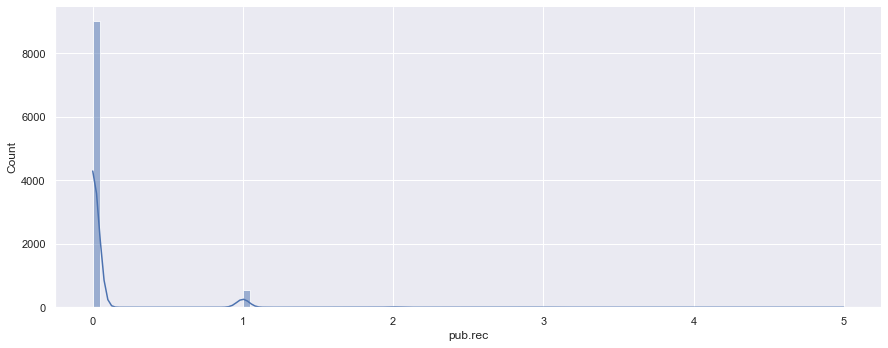

In [88]:
#displaying "pub.rec" feature values
print("DATA:")
print(loan_df[["pub.rec"]])

#checking the distribution of "pub.rec" values
sns.displot(data=loan_df, kde=True, x="pub.rec", kind='hist', height=5, aspect=2.5, bins=100)

#checking the statistics of 'pub.rec' 
print("Feature Statistics:")
print(loan_df["pub.rec"].describe())

#checking the median of 'pub.rec' 
print()
print("Feature Median:")
print(loan_df["pub.rec"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["pub.rec"].describe()["25%"]

#75% value
Q3=loan_df["pub.rec"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

In [89]:
#checking the number of customers having pub.rec more than upr_lim
print("Number of customers having pub.rec equal to 0:")
print((loan_df["pub.rec"]==0).value_counts())

Number of customers having pub.rec equal to 0:
True     9019
False     559
Name: pub.rec, dtype: int64


In [90]:
#percentage of customers having pub.rec equal to 0
9019/9578*100

94.16370849864272

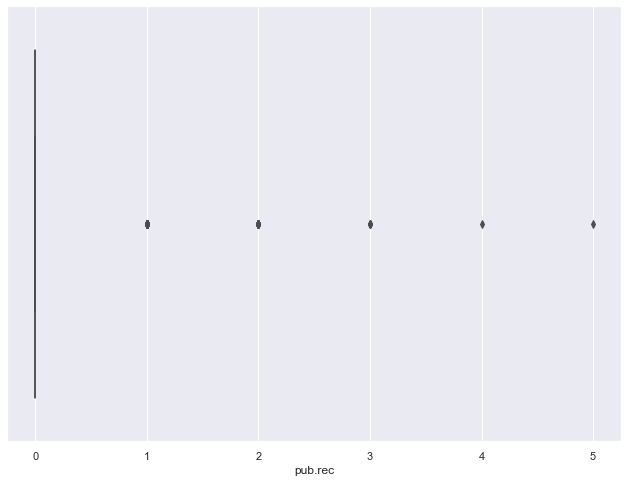

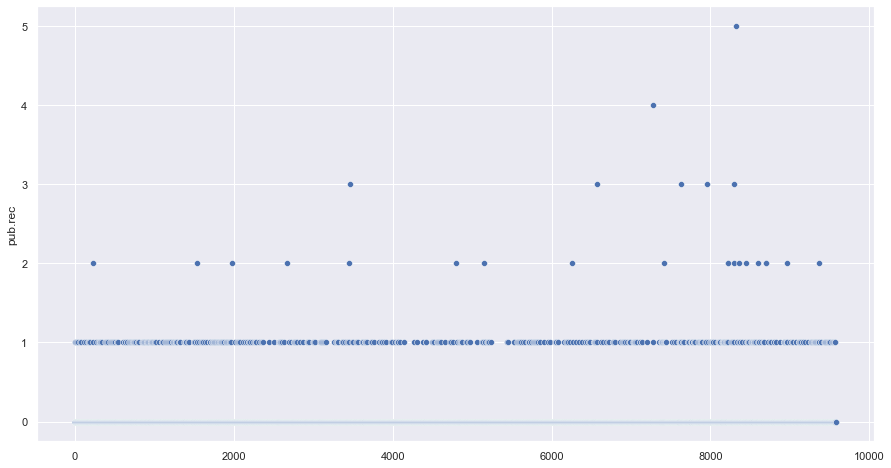

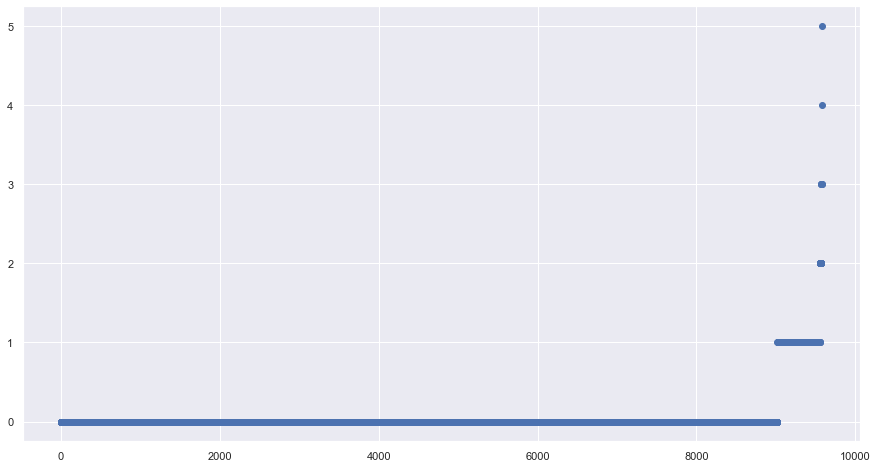

In [91]:
#visualizing the boxplot to see the outliers in the "pub.rec"
sns.boxplot(loan_df["pub.rec"])

#vizualizing the distribution of "pub.rec" with respect to index of rows
plt.figure(figsize=(15,8))
sns.scatterplot(x=loan_df.index, y="pub.rec", data=loan_df)

#vizualizing the distribution of "pub.rec" in ascending order
plt.figure(figsize=(15,8))
plt.scatter(range(len(np.sort(loan_df["pub.rec"]))),np.sort(loan_df["pub.rec"]))

In [92]:
#displaying "pub.rec" feature values
sorted_uniq=sorted(loan_df["pub.rec"].unique())
print("unique values")
print(sorted_uniq)

uniq_len=len(loan_df["pub.rec"].unique())
print()
print("Number of uniques elements:")
print(uniq_len)

#checking the difference of unique pub.rec score
diff_list=[]
for i in range(0,uniq_len-1):
    diff_list.append(sorted(loan_df["pub.rec"].unique())[i+1] - sorted(loan_df["pub.rec"].unique())[i])
    
diff_series=pd.Series(diff_list)
print()
print("Unique difference values:")
print(diff_series.unique())

unique values
[0, 1, 2, 3, 4, 5]

Number of uniques elements:
6

Unique difference values:
[1]


### Key Take-Aways

    1. Median number of derogatory public records is 0.
    2. Min number of derogatory public records is 0.
    3. Maximum number of derogatory public records is 5.
    4. 94.1% customers have derogatory public records equal to 0. (88.3% customers have 0 incidents.)
    5. Majority of customers are not having any derogatory public records.

### not.fully.paid:

1 - loan not fully paid
0 - loan is fully paid

DATA:
      not.fully.paid
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
9573               1
9574               1
9575               1
9576               1
9577               1

[9578 rows x 1 columns]
Purpose values:
0    8045
1    1533
Name: not.fully.paid, dtype: int64


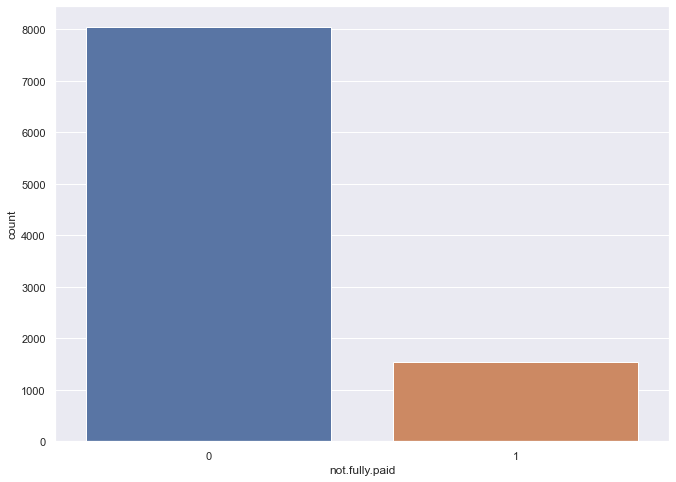

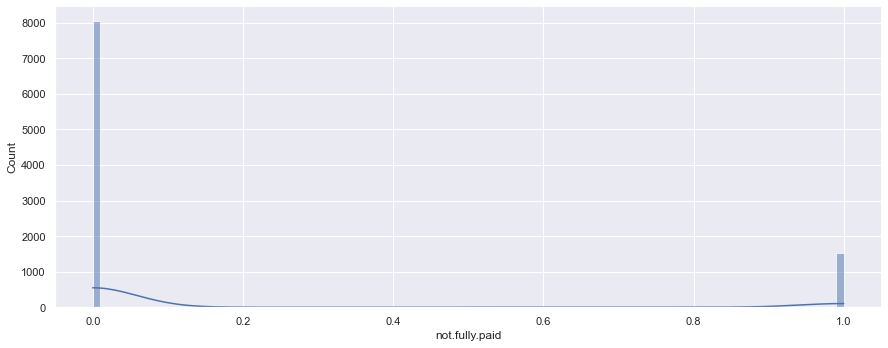

In [93]:
#displaying "not.fully.paid" feature values
print("DATA:")
print(loan_df[["not.fully.paid"]])

#visualizing the the count of not.fully.paid
sns.countplot(x="not.fully.paid",data=loan_df)

#checking the count of not.fully.paid
print("Purpose values:")
print(loan_df["not.fully.paid"].value_counts())

#checking the distribution of "not.fully.paid" values
sns.displot(data=loan_df, kde=True, x="not.fully.paid", kind='hist', height=5, aspect=2.5, bins=100)

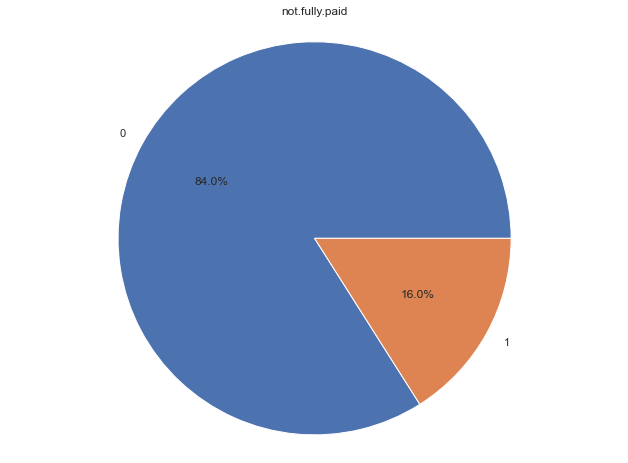

Feature Statistics:
count    9578.000000
mean        0.160054
std         0.366676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: not.fully.paid, dtype: float64

Feature Median:
0.0

Inter Quartile range= 0.0
Lower Limit= 0.0
Upper Limit= 0.0


In [94]:
#visualizing the count distribution of not.fully.paid
plt.pie(loan_df["not.fully.paid"].value_counts(),labels=loan_df["not.fully.paid"].value_counts().index,autopct='%1.1f%%')
plt.title('not.fully.paid')
plt.axis('equal')
plt.show()

#checking the statistics of 'pub.rec' 
print("Feature Statistics:")
print(loan_df["not.fully.paid"].describe())

#checking the median of 'not.fully.paid' 
print()
print("Feature Median:")
print(loan_df["not.fully.paid"].median())

#findng the Lower and Upper limits of the Standard distribution

#25% value
Q1=loan_df["not.fully.paid"].describe()["25%"]

#75% value
Q3=loan_df["not.fully.paid"].describe()["75%"]

#Inrerquartile Range
IQR=Q3-Q1
print()
print("Inter Quartile range=",IQR)

#Upper and Lower limits
lwr_lim = Q1 - 1.5 * IQR
upr_lim = Q3 + 1.5 * IQR

#Upper and Lower limits
print("Lower Limit=",lwr_lim)
print("Upper Limit=",upr_lim)

### Key Take-Aways

    1. 1 - loan not fully paid 
    2. 0 - loan is fully paid
    3. Majority of the customers (84%) have fully paid the loan.
    4. The data can be considered as biased towards "loan is fully paid".

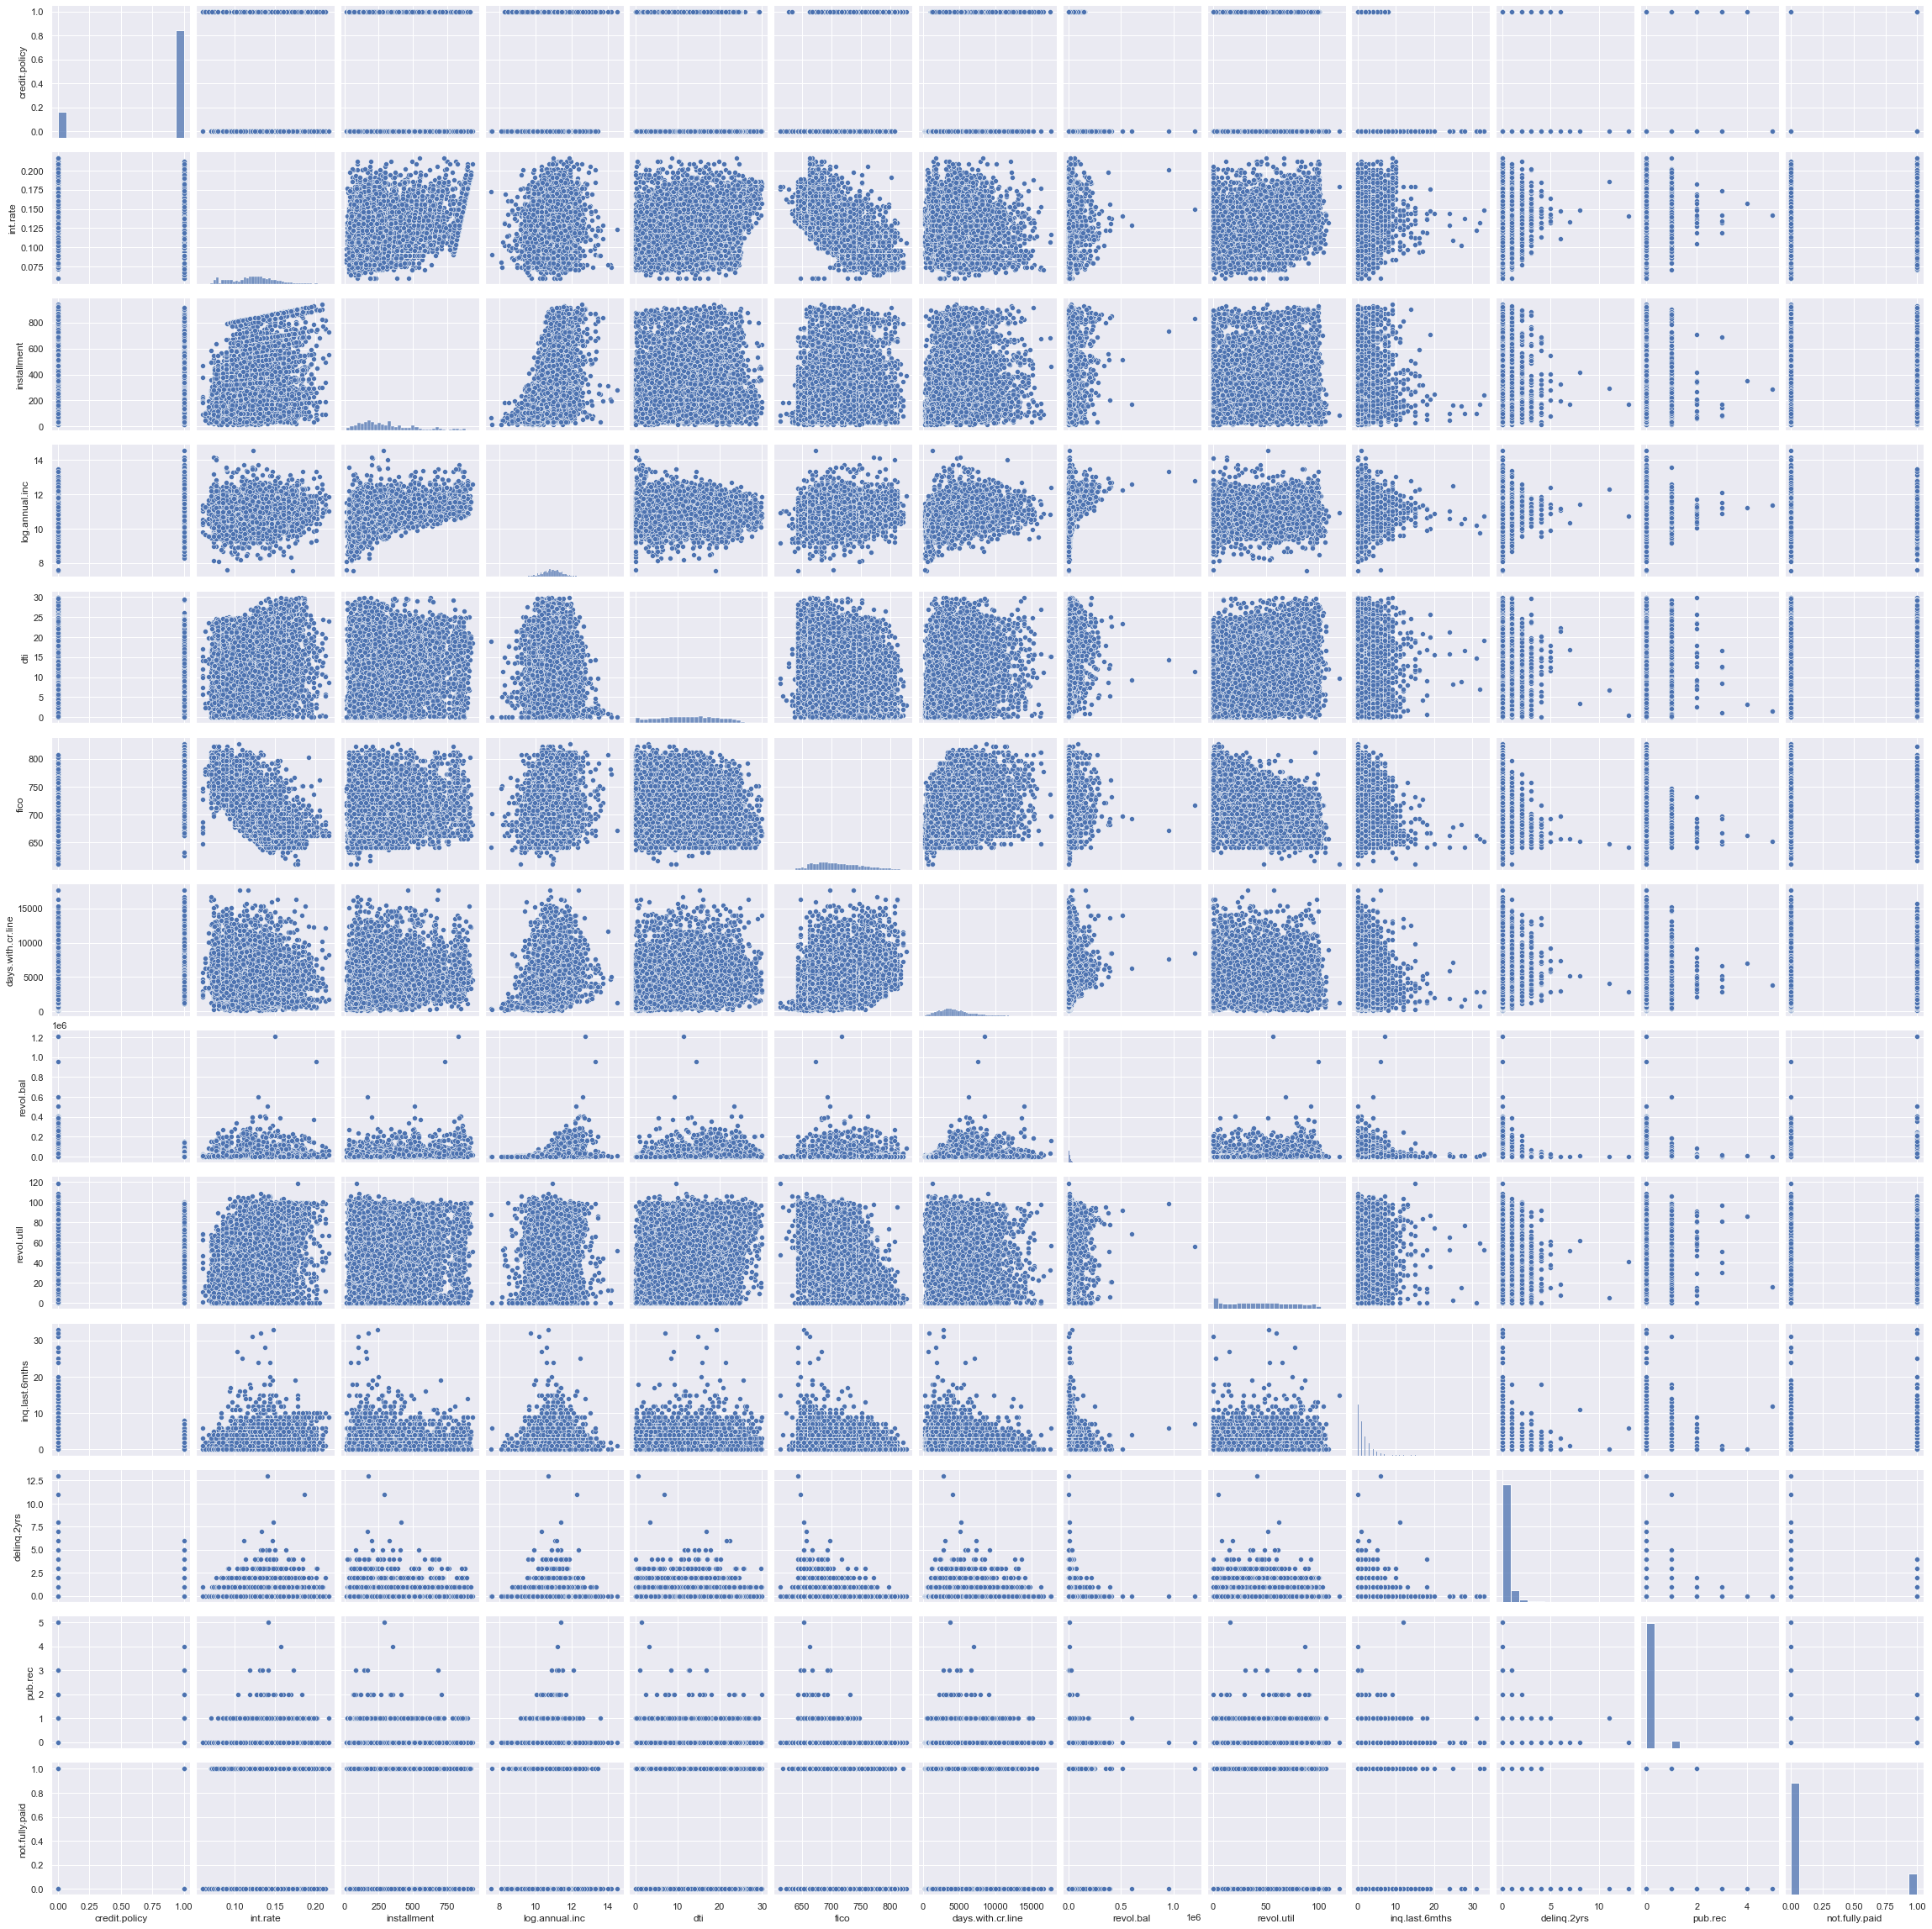

In [95]:
#visualising the correlation between features
sns.pairplot(loan_df)

<AxesSubplot:>

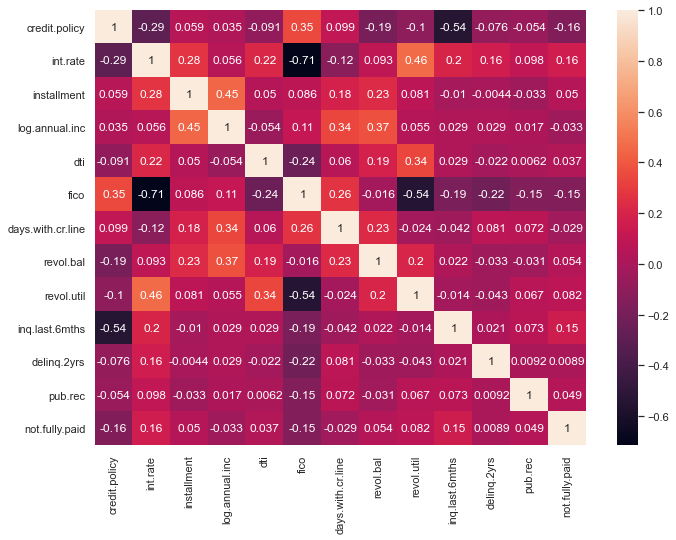

In [96]:
#visualising the correlation between features using heatmap
sns.heatmap(loan_df.corr(),annot=True)

In [97]:
loan_df.corr()

credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0.158119  0.159552     0.049955       -0.033439   

                        dti      fico  days.with.cr.line  revol.bal  \
credit.policy     -0.090901  0.348319           0.099026  -0.187518   
int.rate           0.220006 -0.714821          -0.124022   0.092527   
installment        0.050202  0.086039           0.183297   0.233625   
log.annual.inc    -0.054065  0.114576           0.336896   0.372140   
dti                1.000000 -0.241191           0.060101   0.188748   
fico              -0.241191  1.000000           0.263880  -0.015553   
days.with.cr.line  0.060101  0.263880           1.000000   0.229344   
revol.bal          0.188748 -0.015553           0.229344   1.000000   
revol.util         0.337109 -0.541289          -0.024239   0.203779   
inq.last.6mths     0.029189 -0.185293          -0.041736   0.022394   
delinq.2yrs       -0.021792 -0.216340           0.081374  -0.033243   
pub.rec            0.006209 -0.147592           0.071826  -0.031010   
not.fully.paid     0.037362 -0.149666          -0.029237   0.053699   

                   revol.util  inq.last.6mths  delinq.2yrs   pub.rec  \
credit.policy       -0.104095       -0.535511    -0.076318 -0.054243   
int.rate             0.464837        0.202780     0.156079  0.098162   
installment          0.081356       -0.010419    -0.004368 -0.032760   
log.annual.inc       0.054881        0.029171     0.029203  0.016506   
dti                  0.337109        0.029189    -0.021792  0.006209   
fico                -0.541289       -0.185293    -0.216340 -0.147592   
days.with.cr.line   -0.024239       -0.041736     0.081374  0.071826   
revol.bal            0.203779        0.022394    -0.033243 -0.031010   
revol.util           1.000000       -0.013880    -0.042740  0.066717   
inq.last.6mths      -0.013880        1.000000     0.021245  0.072673   
delinq.2yrs         -0.042740        0.021245     1.000000  0.009184   
pub.rec              0.066717        0.072673     0.009184  1.000000   
not.fully.paid       0.082088        0.149452     0.008881  0.048634   

                   not.fully.paid  
credit.policy           -0.158119  
int.rate                 0.159552  
installment              0.049955  
log.annual.inc          -0.033439  
dti                      0.037362  
fico                    -0.149666  
days.with.cr.line       -0.029237  
revol.bal                0.053699  
revol.util               0.082088  
inq.last.6mths           0.149452  
delinq.2yrs              0.008881  
pub.rec                  0.048634  
not.fully.paid           1.000000

In [98]:
#sorting the correlation matric values
correlation_mat = loan_df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs_abs = corr_pairs.abs()
sorted_pairs = corr_pairs_abs.sort_values(kind="quicksort",ascending=False)
print(sorted_pairs)

credit.policy   credit.policy     1.000000
int.rate        int.rate          1.000000
pub.rec         pub.rec           1.000000
delinq.2yrs     delinq.2yrs       1.000000
inq.last.6mths  inq.last.6mths    1.000000
                                    ...   
not.fully.paid  delinq.2yrs       0.008881
pub.rec         dti               0.006209
dti             pub.rec           0.006209
installment     delinq.2yrs       0.004368
delinq.2yrs     installment       0.004368
Length: 169, dtype: float64


In [99]:
corr_len=len(sorted_pairs)
for i in range (corr_len-1):
    #print(sorted_pairs[i])
    print(sorted_pairs.index[i], ":", sorted_pairs[i])

('credit.policy', 'credit.policy') : 1.0
('int.rate', 'int.rate') : 1.0
('pub.rec', 'pub.rec') : 1.0
('delinq.2yrs', 'delinq.2yrs') : 1.0
('inq.last.6mths', 'inq.last.6mths') : 1.0
('revol.util', 'revol.util') : 1.0
('revol.bal', 'revol.bal') : 1.0
('fico', 'fico') : 1.0
('dti', 'dti') : 1.0
('log.annual.inc', 'log.annual.inc') : 1.0
('installment', 'installment') : 1.0
('days.with.cr.line', 'days.with.cr.line') : 1.0
('not.fully.paid', 'not.fully.paid') : 1.0
('int.rate', 'fico') : 0.7148207714193544
('fico', 'int.rate') : 0.7148207714193544
('revol.util', 'fico') : 0.5412893350075594
('fico', 'revol.util') : 0.5412893350075594
('inq.last.6mths', 'credit.policy') : 0.535511179331188
('credit.policy', 'inq.last.6mths') : 0.535511179331188
('revol.util', 'int.rate') : 0.4648372794943528
('int.rate', 'revol.util') : 0.4648372794943528
('installment', 'log.annual.inc') : 0.4481021536896286
('log.annual.inc', 'installment') : 0.4481021536896286
('revol.bal', 'log.annual.inc') : 0.372139602

### Key Take-Aways

    1. Highest correlation is observed between ('int.rate', 'fico') = -0.71.
    2. One of the second highest correlationis observed between ('revol.util', 'fico') = -0.54.
    3. Other of the second highest correlationis observed between ('inq.last.6mths', 'credit.policy') = -0.54.
    4. Lowest correlation is observed between ('installment', 'delinq.2yrs') = 0.004

<AxesSubplot:xlabel='fico', ylabel='int.rate'>

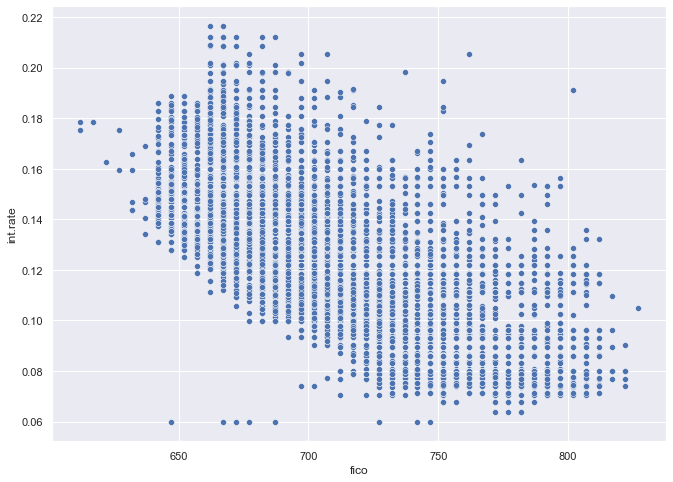

In [100]:
#checking the correlation between "fico" and "int.rate"
sns.scatterplot(x="fico",y="int.rate", data=loan_df)

<AxesSubplot:xlabel='fico', ylabel='not.fully.paid'>

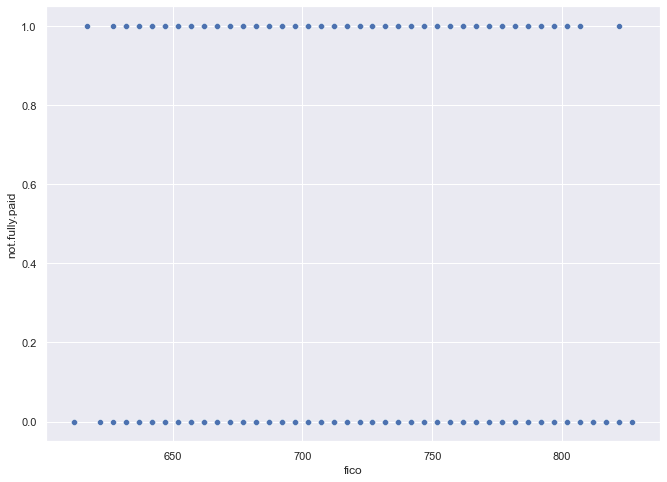

In [101]:
#checking the correlation between "fico" and "not.fully.paid"
sns.scatterplot(x="fico",y="not.fully.paid", data=loan_df)

<AxesSubplot:xlabel='int.rate', ylabel='not.fully.paid'>

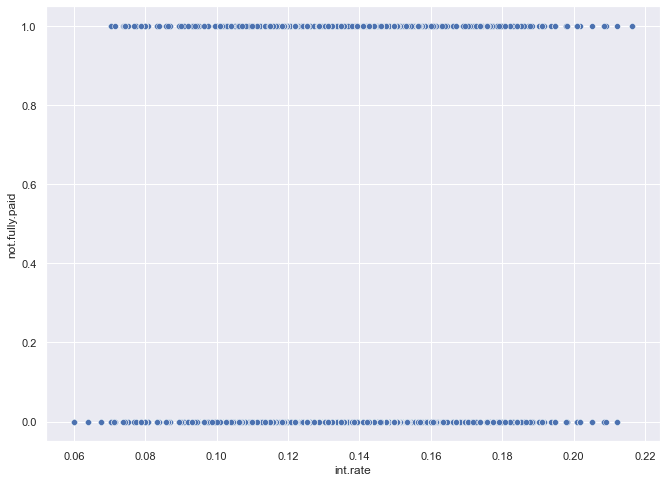

In [102]:
#checking the correlation between "fico" and "not.fully.paid"
sns.scatterplot(x="int.rate",y="not.fully.paid", data=loan_df)

<AxesSubplot:xlabel='revol.util', ylabel='fico'>

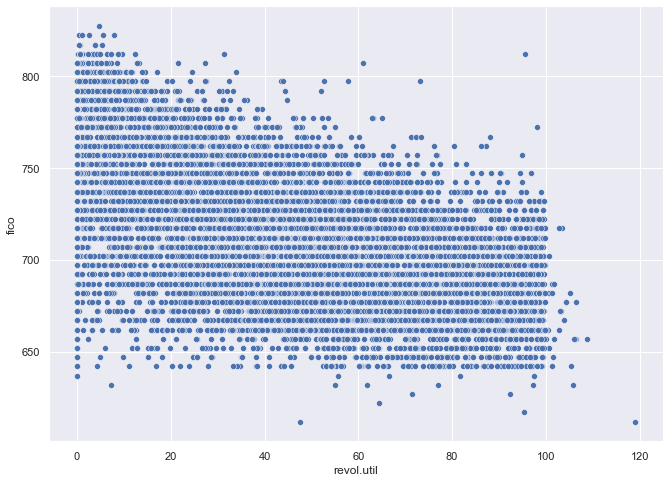

In [103]:
#checking the correlation between "revol.util" and "fico"
sns.scatterplot(x="revol.util",y="fico", data=loan_df)

<AxesSubplot:xlabel='inq.last.6mths', ylabel='credit.policy'>

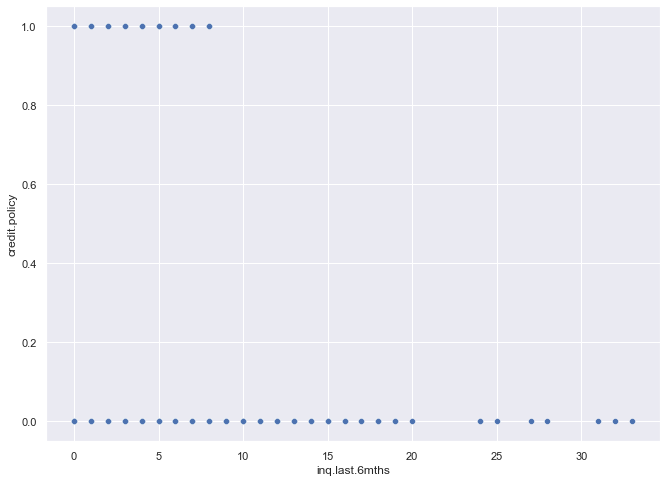

In [104]:
#checking the correlation between "inq.last.6mths" and "credit.policy"
sns.scatterplot(x="inq.last.6mths",y="credit.policy", data=loan_df)

<AxesSubplot:xlabel='installment', ylabel='delinq.2yrs'>

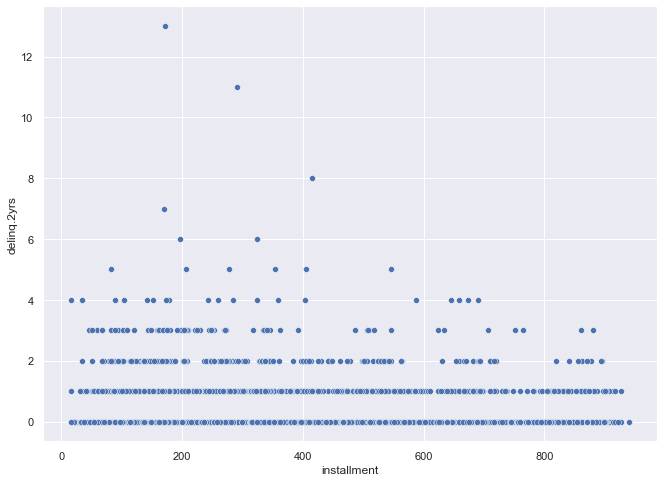

In [105]:
#checking the correlation between "installment" and "delinq.2yrs"
sns.scatterplot(x="installment",y="delinq.2yrs", data=loan_df)

### Key Take-Aways

    1. Highest correlation is observed between ('int.rate', 'fico') = -0.71.
    2. 'int.rate' or 'fico' can be dropped from data set to reduce the number of features.

## Feature Engineering

    1. Perform encoding for categorical feature.
    2. Remove the feature with with high correlation.
    3. Split the data into testing and training set.

In [106]:
#displaying the original dataset
loan_df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [107]:
#Droping the target column to generate feature data set
X=loan_df.drop(['not.fully.paid'], axis = 1)

#printing the feature only data set
X

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  
0                  0            0        0  
1                  0            0        0  
2                  1            0        0  
3                  1            0        0  
4                  0            1        0  
...              ...          ...      ...  
9573               2            0        0  
9574               5            0        0  
9575               8            0        0  
9576               5            0        0  
9577               6            0        0  

[9578 rows x 13 columns]

In [108]:
#droping the 'int.rate' to generate X_fico feature dataset
X_fico=X.drop(['int.rate'], axis = 1)

#printing the feature only data set after droping 'int.rate'
X_fico

credit.policy             purpose  installment  log.annual.inc    dti  \
0                 1  debt_consolidation       829.10       11.350407  19.48   
1                 1         credit_card       228.22       11.082143  14.29   
2                 1  debt_consolidation       366.86       10.373491  11.63   
3                 1  debt_consolidation       162.34       11.350407   8.10   
4                 1         credit_card       102.92       11.299732  14.97   
...             ...                 ...          ...             ...    ...   
9573              0           all_other       344.76       12.180755  10.39   
9574              0           all_other       257.70       11.141862   0.21   
9575              0  debt_consolidation        97.81       10.596635  13.09   
9576              0    home_improvement       351.58       10.819778  19.18   
9577              0  debt_consolidation       853.43       11.264464  16.28   

      fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0      737        5639.958333      28854        52.1               0   
1      707        2760.000000      33623        76.7               0   
2      682        4710.000000       3511        25.6               1   
3      712        2699.958333      33667        73.2               1   
4      667        4066.000000       4740        39.5               0   
...    ...                ...        ...         ...             ...   
9573   672       10474.000000     215372        82.1               2   
9574   722        4380.000000        184         1.1               5   
9575   687        3450.041667      10036        82.9               8   
9576   692        1800.000000          0         3.2               5   
9577   732        4740.000000      37879        57.0               6   

      delinq.2yrs  pub.rec  
0               0        0  
1               0        0  
2               0        0  
3               0        0  
4               1        0  
...           ...      ...  
9573            0        0  
9574            0        0  
9575            0        0  
9576            0        0  
9577            0        0  

[9578 rows x 12 columns]

In [109]:
#one-hot encoding the trainng set-1
one_hot_encoded_X_fico = pd.get_dummies(X_fico, columns = ['purpose']).values

#printing the training set-1
one_hot_encoded_X_fico

array([[  1.        , 829.1       ,  11.35040654, ...,   0.        ,
          0.        ,   0.        ],
       [  1.        , 228.22      ,  11.08214255, ...,   0.        ,
          0.        ,   0.        ],
       [  1.        , 366.86      ,  10.37349118, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  97.81      ,  10.59663473, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 351.58      ,  10.81977828, ...,   1.        ,
          0.        ,   0.        ],
       [  0.        , 853.43      ,  11.26446411, ...,   0.        ,
          0.        ,   0.        ]])

In [110]:
#defining the target column
Y=loan_df['not.fully.paid'].values

#printing the feature only data set
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [111]:
#the data set is divided into training and testing set
x_train,x_test,y_train,y_test=train_test_split(one_hot_encoded_X_fico ,Y ,test_size=0.3,random_state=0)

#checking the shape of the training array
print(x_train.shape)

#checking the shape of the training array
print(x_test.shape)

(6704, 18)
(2874, 18)


In [112]:
# importing the sklearn library
from sklearn.preprocessing import StandardScaler

In [113]:
# initilialize the standardiser
sc = StandardScaler()

# fit and transfrom
x_train_standardized = sc.fit_transform(x_train)
x_test_standardized = sc.transform(x_test)

## Model Building

In [114]:
# ANN sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [115]:
# initializing the model
ANN_model_1 = Sequential()

# input layer
ANN_model_1.add(Dense(units=32,activation='relu',kernel_initializer='uniform', input_dim = 18))
#model.add(Dropout(0.2))

# hidden layer
ANN_model_1.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.2))

# hidden layer
ANN_model_1.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.2))

# output layer
ANN_model_1.add(Dense(1, activation='sigmoid'))

# compile model
ANN_model_1.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
ANN_model_1.fit(x_train_standardized, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
671/671 [==============================] - 2s 2ms/step - loss: 0.4326 - accuracy: 0.8401
Epoch 2/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4099 - accuracy: 0.8411
Epoch 3/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8411
Epoch 4/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8411
Epoch 5/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4065 - accuracy: 0.8411
Epoch 6/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4062 - accuracy: 0.8411
Epoch 7/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8411
Epoch 8/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8411
Epoch 9/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8411
Epoch 10/50
671/671 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8411

In [116]:
# Improrting the libraries for evaluating model
from sklearn.metrics import classification_report, roc_curve, auc
from matplotlib.pyplot import figure

# Defining a fuction to evaluate and print the statistics of the model
def predict_evaluate (x,y, classifier_model):

    # Predicting the Test set results
    train_preds_proba = classifier_model.predict(x)

    # occurances with probability more than 50% is categorised as "YES" and vice versa
    train_preds = np.where(train_preds_proba > 0.5, 1, 0)
    print('*'*20)
    print("Length of X set:", len(train_preds))
    print("Length of Y set:", len(x))
    print('*'*20)
    
    # Printing  the classification report
    print(classification_report(y, train_preds))
    print('*'*20)

    # Ploting the ROC and AUC of the model
    figure(figsize=(10, 10), dpi=80)
    fpr, tpr, thresholds = roc_curve(y, train_preds)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' %auc(fpr, tpr))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title('ROC curve')
    plt.legend(loc="lower right", facecolor  = "white")
    plt.show()

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5639
           1       0.86      0.21      0.34      1065

    accuracy                           0.87      6704
   macro avg       0.86      0.60      0.63      6704
weighted avg       0.87      0.87      0.83      6704

********************


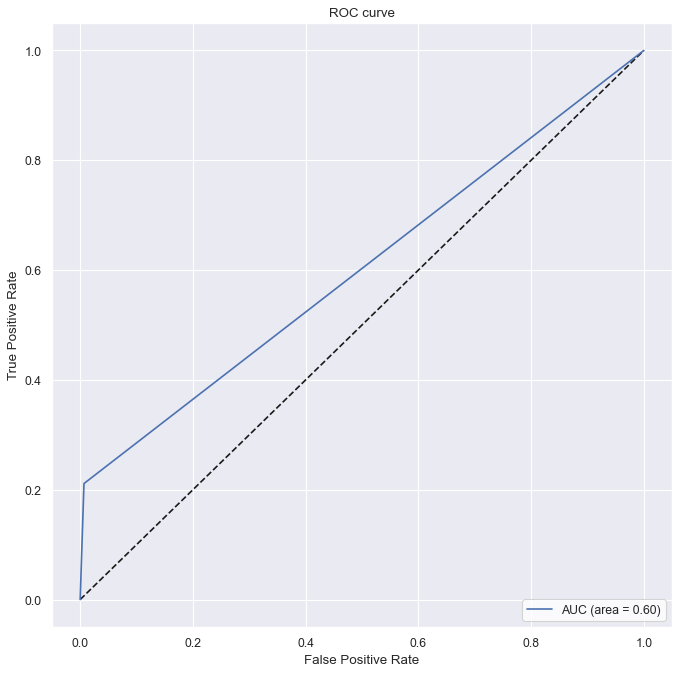

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2406
           1       0.28      0.06      0.10       468

    accuracy                           0.82      2874
   macro avg       0.56      0.52      0.50      2874
weighted avg       0.75      0.82      0.77      2874

********************


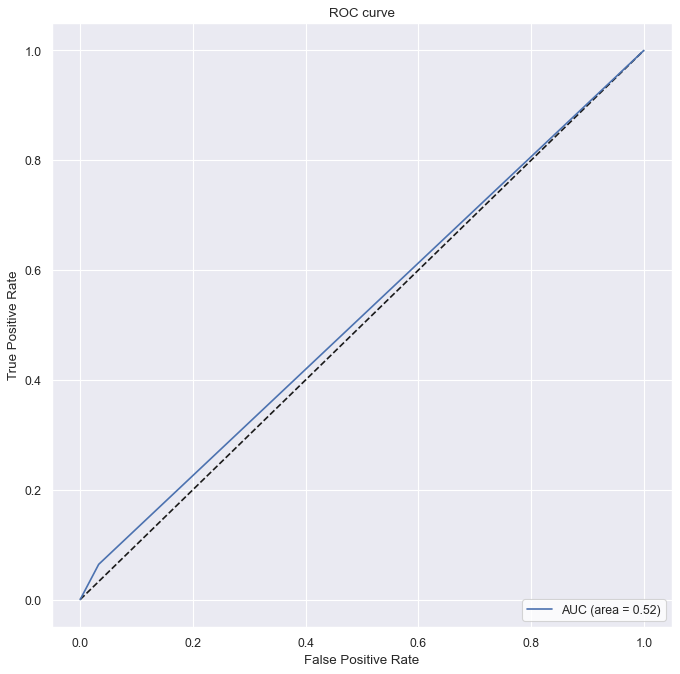

In [117]:
print('***TRAIN***'*10)
# Using the function to evaluavte the model with train-set
predict_evaluate(x_train_standardized, y_train, ANN_model_1)

print('***TEST***'*10)
# Using the function to evaluavte the model with test-set
predict_evaluate(x_test_standardized, y_test, ANN_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5639
           1       0.53      0.03      0.06      1065

    accuracy                           0.84      6704
   macro avg       0.69      0.51      0.49      6704
weighted avg       0.79      0.84      0.78      6704

********************


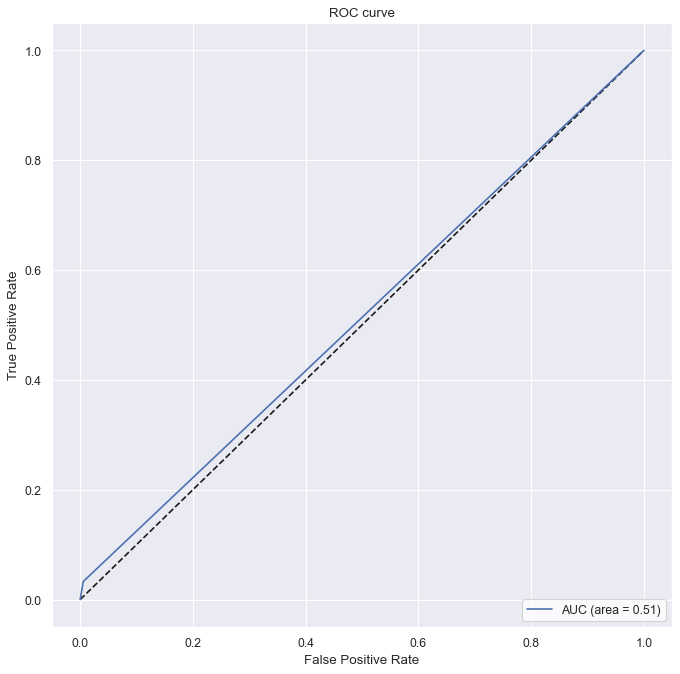

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.22      0.01      0.02       468

    accuracy                           0.83      2874
   macro avg       0.53      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

********************


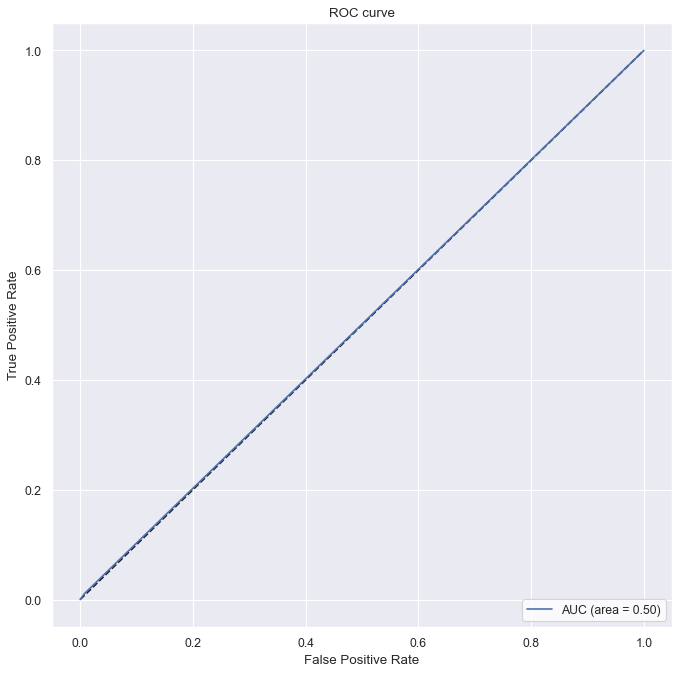

In [118]:
# Building logistic regression model to check the performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# BUilding the Logistic Regression model
LG_model_1 = LogisticRegression()
LG_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the Logistic Regression model statictics for train-set
predict_evaluate(x_train_standardized, y_train, LG_model_1)

print('***TEST***'*10)
# Checking the Logistic Regression model statictics for test-set
predict_evaluate(x_test_standardized, y_test, LG_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2406
           1       1.00      1.00      1.00       468

    accuracy                           1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

********************


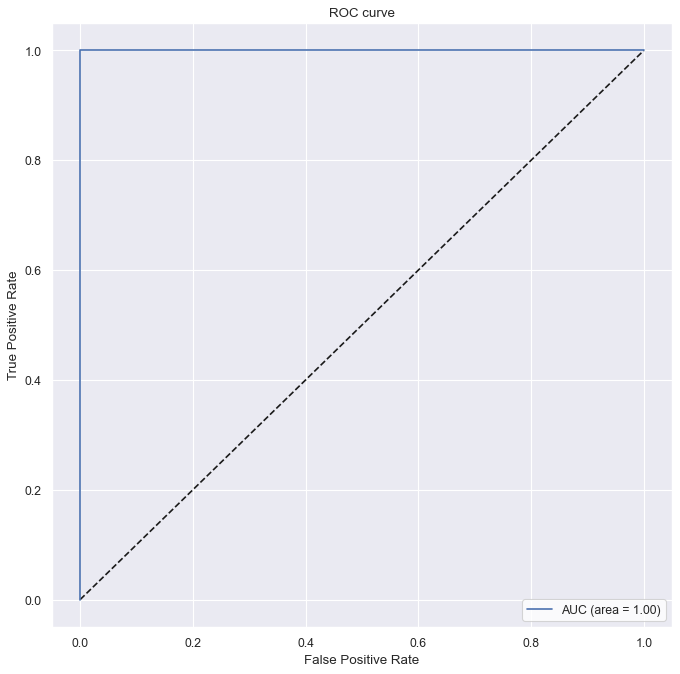

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2406
           1       1.00      1.00      1.00       468

    accuracy                           1.00      2874
   macro avg       1.00      1.00      1.00      2874
weighted avg       1.00      1.00      1.00      2874

********************


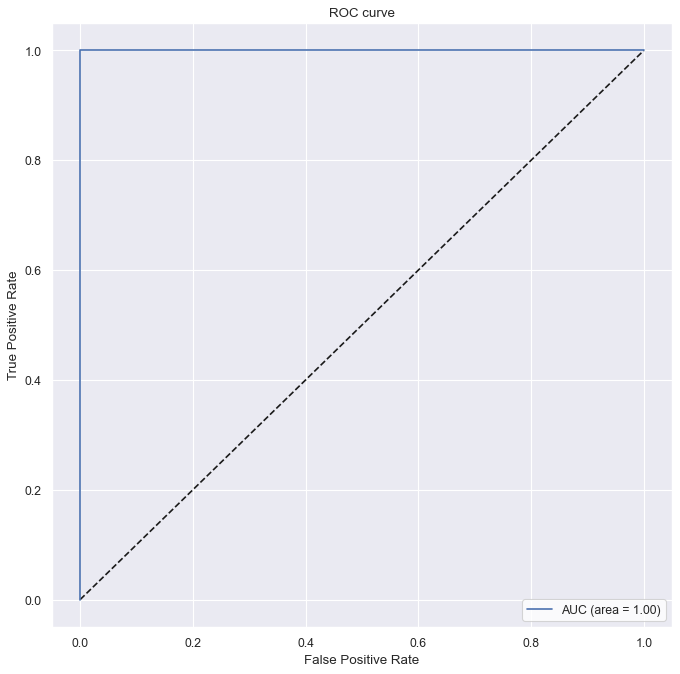

In [119]:
# importing random forest library
from sklearn.ensemble import RandomForestClassifier

#Building a random forest model
RF_model_1=RandomForestClassifier()
RF_model_1.fit(x_test_standardized, y_test)

print('***TRAIN***'*10)
# Checking the random forest model statictics for test-set
predict_evaluate(x_test_standardized, y_test, RF_model_1)

print('***TEST***'*10)
# Checking the random forest model statictics for train-set
predict_evaluate(x_test_standardized, y_test, RF_model_1)

[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5639
           1       1.00      0.79      0.88      1065

    accuracy                           0.97      6704
   macro avg       0.98      0.89      0.93      6704
weighted avg       0.97      0.97      0.96      6704

********************


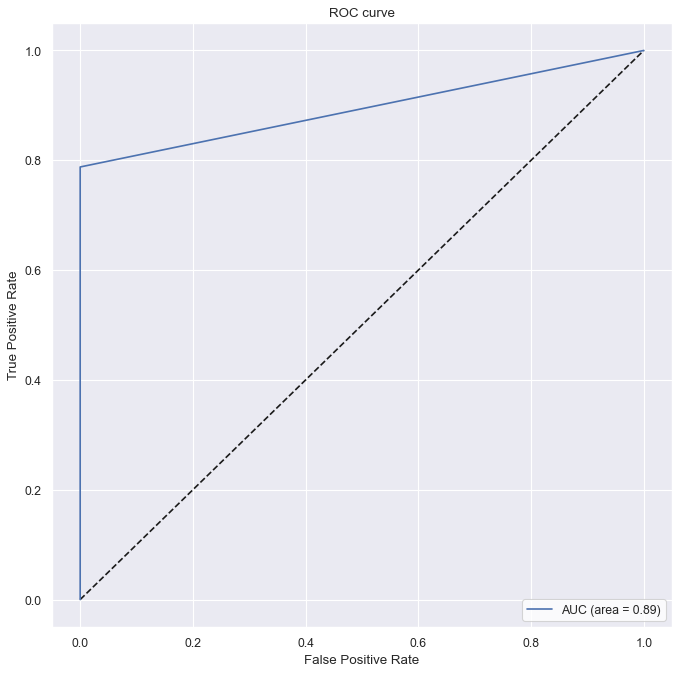

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2406
           1       0.32      0.08      0.12       468

    accuracy                           0.82      2874
   macro avg       0.58      0.52      0.51      2874
weighted avg       0.76      0.82      0.78      2874

********************


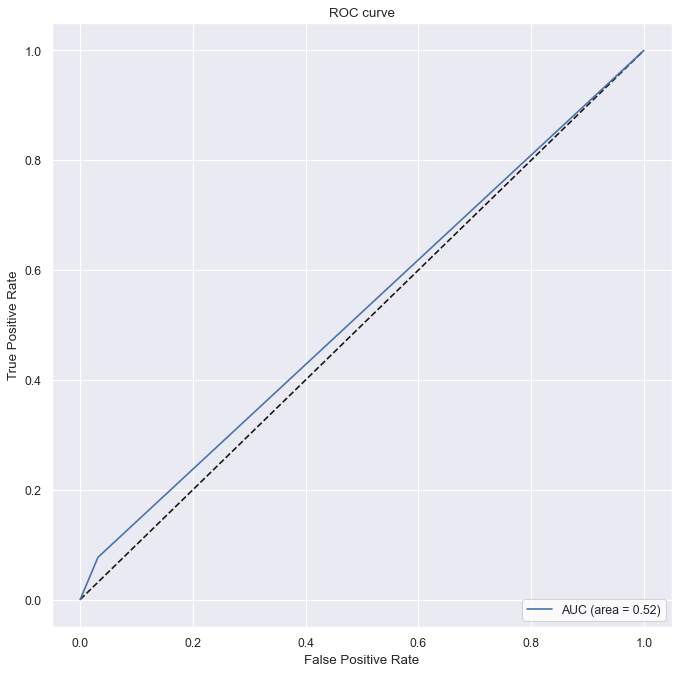

In [120]:
# importing random forest library
from xgboost import XGBClassifier

#Building a random forest model
XGB_model_1 = XGBClassifier()
XGB_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the random forest model statictics for train-set
predict_evaluate(x_train_standardized, y_train, XGB_model_1)

print('***TEST***'*10)
# Checking the random forest model statictics for train-set
predict_evaluate(x_test_standardized, y_test, XGB_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5639
           1       0.29      0.29      0.29      1065

    accuracy                           0.78      6704
   macro avg       0.58      0.58      0.58      6704
weighted avg       0.78      0.78      0.78      6704

********************


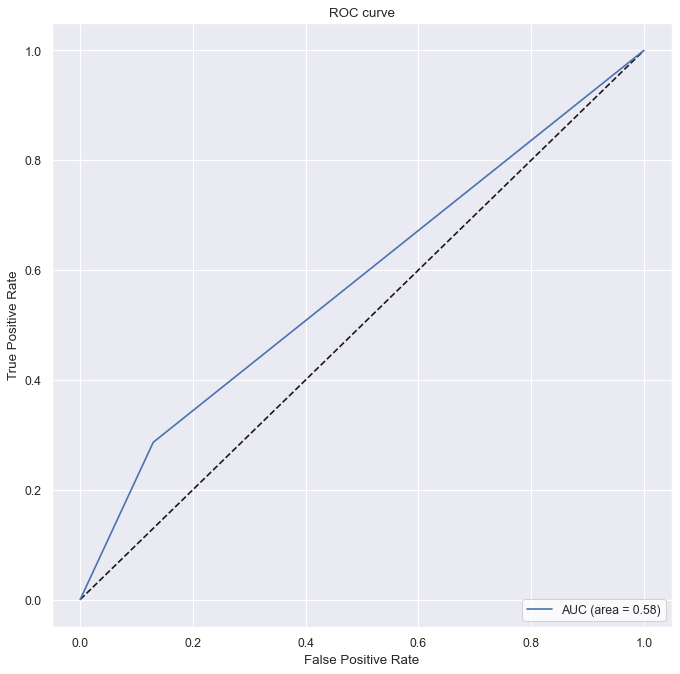

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      2406
           1       0.31      0.31      0.31       468

    accuracy                           0.77      2874
   macro avg       0.59      0.59      0.59      2874
weighted avg       0.77      0.77      0.77      2874

********************


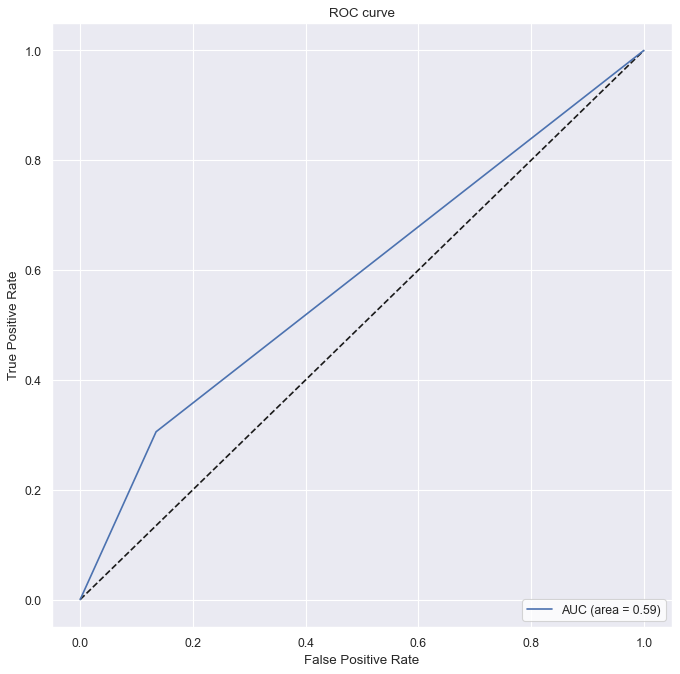

In [121]:
# Building Naive Bayes model to check the performance
from sklearn.naive_bayes import GaussianNB

# BUilding the Logistic Regression model
NB_model_1 = GaussianNB()
NB_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the Naive Bayes model statictics for train-set
predict_evaluate(x_train_standardized, y_train, NB_model_1)

print('***TEST***'*10)
# Checking the Naive Bayes model statictics for test-set
predict_evaluate(x_test_standardized, y_test, NB_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5639
           1       0.71      0.20      0.32      1065

    accuracy                           0.86      6704
   macro avg       0.79      0.59      0.62      6704
weighted avg       0.84      0.86      0.83      6704

********************


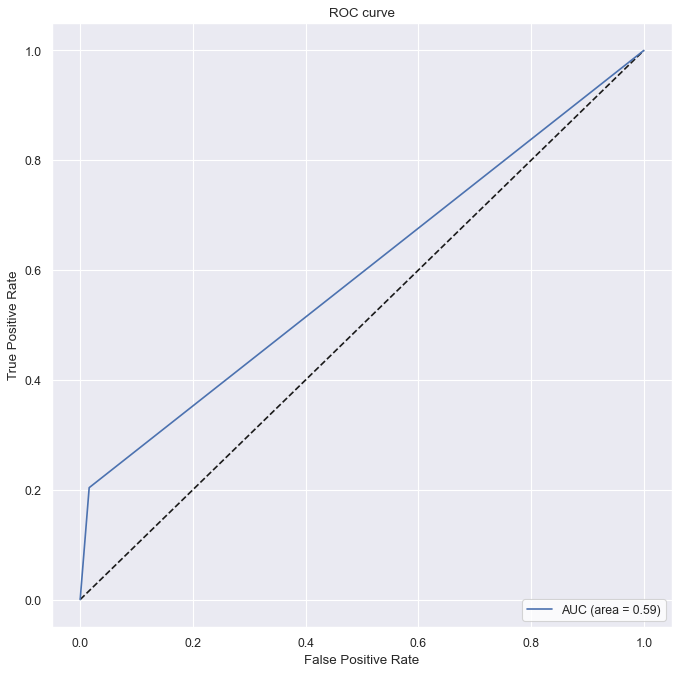

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2406
           1       0.28      0.08      0.13       468

    accuracy                           0.82      2874
   macro avg       0.56      0.52      0.51      2874
weighted avg       0.75      0.82      0.77      2874

********************


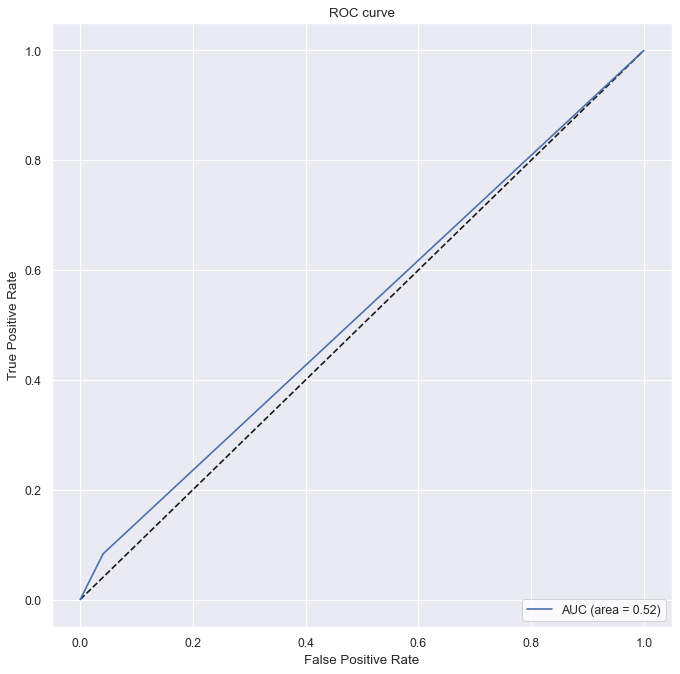

In [122]:
# Building K-Nearest Neighbours model to check the performance
from sklearn.neighbors import KNeighborsClassifier

# BUilding the K-Nearest Neighbours model
KNN_model_1 = KNeighborsClassifier()
KNN_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the K-Nearest Neighbours model statictics for train-set
predict_evaluate(x_train_standardized, y_train, KNN_model_1)

print('***TEST***'*10)
# Checking the K-Nearest Neighbours model statictics for test-set
predict_evaluate(x_test_standardized, y_test, KNN_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5639
           1       1.00      1.00      1.00      1065

    accuracy                           1.00      6704
   macro avg       1.00      1.00      1.00      6704
weighted avg       1.00      1.00      1.00      6704

********************


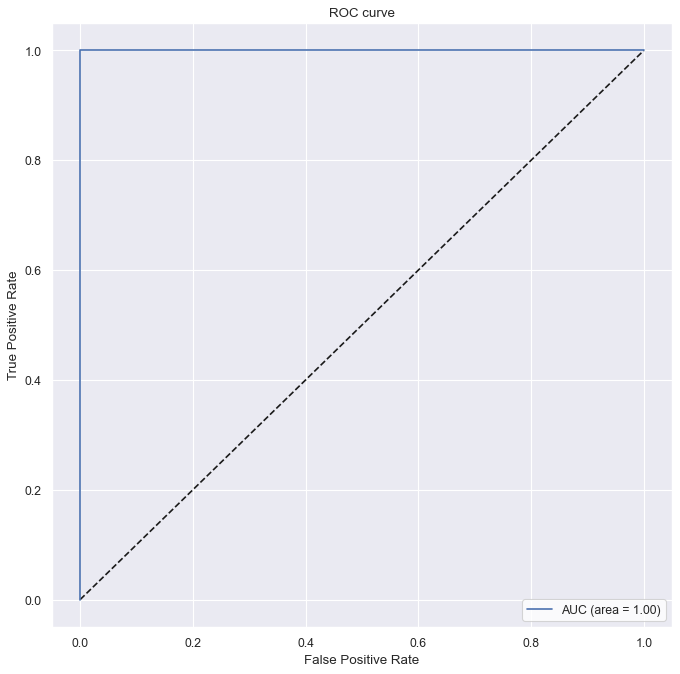

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2406
           1       0.21      0.22      0.21       468

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874

********************


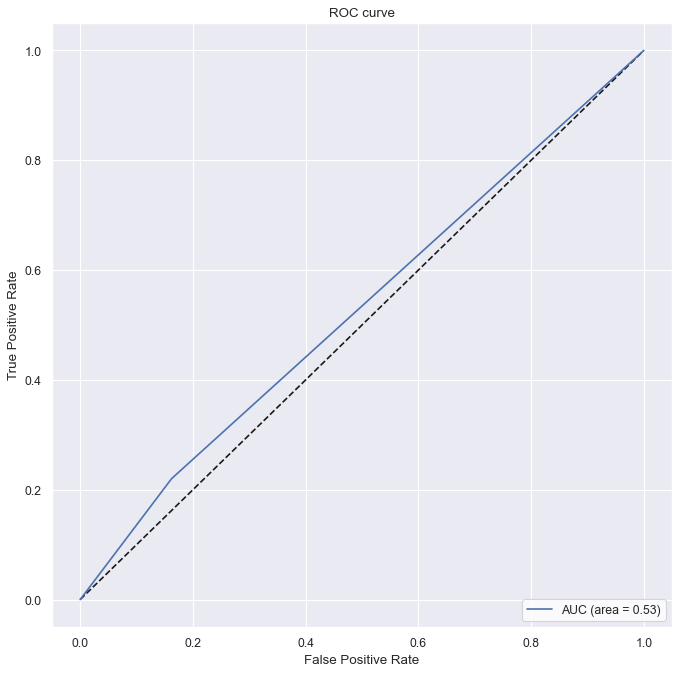

In [123]:
# Building Decision Tree model to check the performance
from sklearn.tree import DecisionTreeClassifier

# BUilding the Decision Tree Neighbours model
DT_model_1 = DecisionTreeClassifier()
DT_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the Decision Tree model statictics for train-set
predict_evaluate(x_train_standardized, y_train, DT_model_1)

print('***TEST***'*10)
# Checking the Decision Tree model statictics for test-set
predict_evaluate(x_test_standardized, y_test, DT_model_1)

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 6704
Length of Y set: 6704
********************
              precision    recall  f1-score   support

           0       0.84      1.00      0.92      5639
           1       0.97      0.03      0.05      1065

    accuracy                           0.85      6704
   macro avg       0.91      0.51      0.48      6704
weighted avg       0.86      0.85      0.78      6704

********************


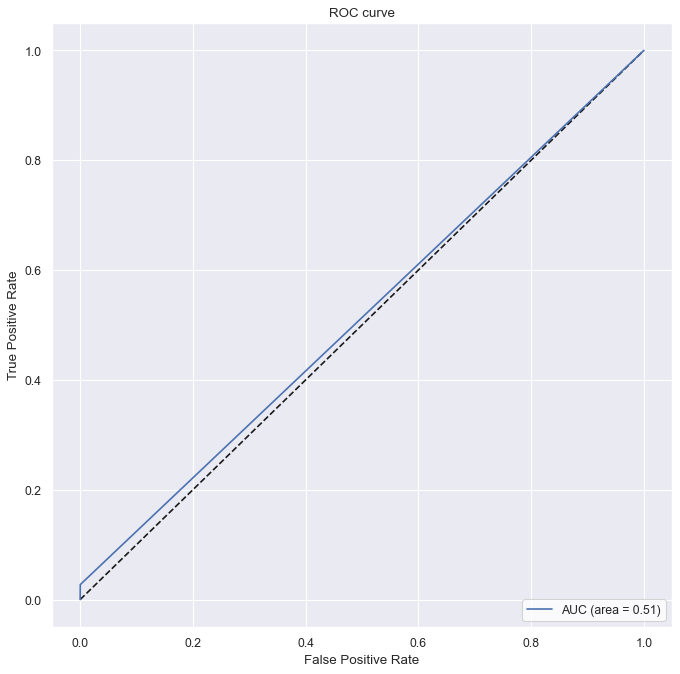

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 2874
Length of Y set: 2874
********************
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.00      0.00      0.00       468

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874

********************


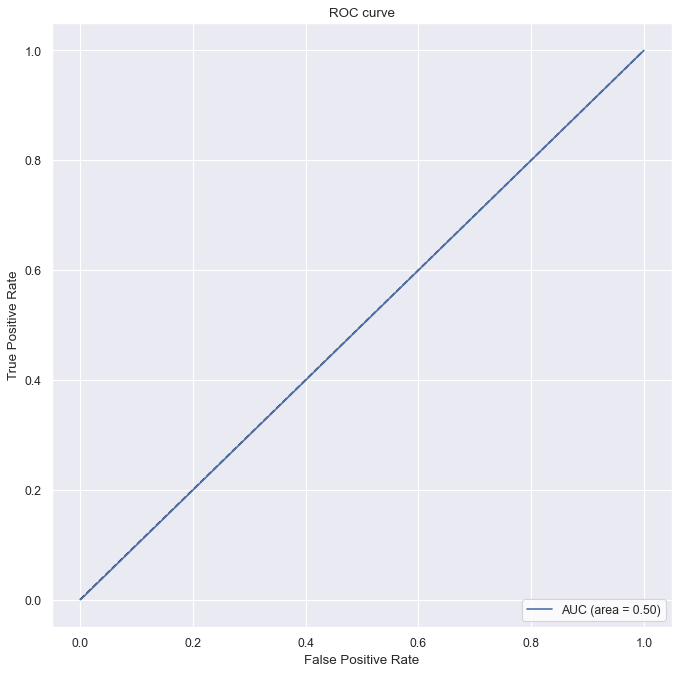

In [124]:
# Building Decision Tree model to check the performance
from sklearn.svm import SVC

# BUilding the Decision Tree Neighbours model
SVM_model_1 = SVC()
SVM_model_1.fit(x_train_standardized, y_train)

print('***TRAIN***'*10)
# Checking the Decision Tree model statictics for train-set
predict_evaluate(x_train_standardized, y_train, SVM_model_1)

print('***TEST***'*10)
# Checking the Decision Tree model statictics for test-set
predict_evaluate(x_test_standardized, y_test, SVM_model_1)

In [125]:
# Import the library to perform SMOTE for the imbalanced target class
from imblearn.over_sampling import SMOTE

# Perform the SMOTE operation
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(one_hot_encoded_X_fico, Y)

# Split the oversampled data into train and test set
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# fit and transfrom
x_train_standardized_sm = sc.fit_transform(X_train_sm)
x_test_standardized_sm = sc.transform(X_test_sm)

In [126]:
# Checking the number of '1' and '0' in original Y
print ("Original 'Y'")
print("Number of '0' :", (Y == 0).sum())
print("Number of '1' :", (Y == 1).sum())

Original 'Y'
Number of '0' : 8045
Number of '1' : 1533


In [127]:
# Checking the number of '1' and '0' in SMOTE updated Y
print ("Updated 'Y'")
print("Number of '0' :", (y_sm == 0).sum())
print("Number of '1' :", (y_sm == 1).sum())

Updated 'Y'
Number of '0' : 8045
Number of '1' : 8045


In [128]:
# Training the ANN model with oversampled data
# initializing the model
ANN_model_sm = Sequential()

# input layer
ANN_model_sm.add(Dense(units=32,activation='relu',kernel_initializer='uniform', input_dim = 18))
#model.add(Dropout(0.2))

# hidden layer
ANN_model_sm.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.2))

# hidden layer
ANN_model_sm.add(Dense(units=32, activation='relu', kernel_initializer='uniform'))
#model.add(Dropout(0.2))

# output layer
ANN_model_sm.add(Dense(1, activation='sigmoid'))

# compile model
ANN_model_sm.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
ANN_model_sm.fit(x_train_standardized_sm, y_train_sm, batch_size = 10, epochs = 50)

Epoch 1/50
1288/1288 [==============================] - 3s 2ms/step - loss: 0.6168 - accuracy: 0.6576
Epoch 2/50
1288/1288 [==============================] - 3s 2ms/step - loss: 0.5279 - accuracy: 0.7327
Epoch 3/50
1288/1288 [==============================] - 2s 2ms/step - loss: 0.4650 - accuracy: 0.7707
Epoch 4/50
1288/1288 [==============================] - 3s 2ms/step - loss: 0.4389 - accuracy: 0.7829
Epoch 5/50
1288/1288 [==============================] - 2s 2ms/step - loss: 0.4232 - accuracy: 0.7939
Epoch 6/50
1288/1288 [==============================] - 3s 2ms/step - loss: 0.4168 - accuracy: 0.7951
Epoch 7/50
1288/1288 [==============================] - 2s 2ms/step - loss: 0.4115 - accuracy: 0.7996
Epoch 8/50
1288/1288 [==============================] - 2s 2ms/step - loss: 0.4081 - accuracy: 0.7984
Epoch 9/50
1288/1288 [==============================] - 3s 2ms/step - loss: 0.4041 - accuracy: 0.8010
Epoch 10/50
1288/1288 [==============================] - 2s 2ms/step - loss: 0.399

***TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN******TRAIN***
********************
Length of X set: 12872
Length of Y set: 12872
********************
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      6436
           1       0.96      0.69      0.81      6436

    accuracy                           0.83     12872
   macro avg       0.86      0.83      0.83     12872
weighted avg       0.86      0.83      0.83     12872

********************


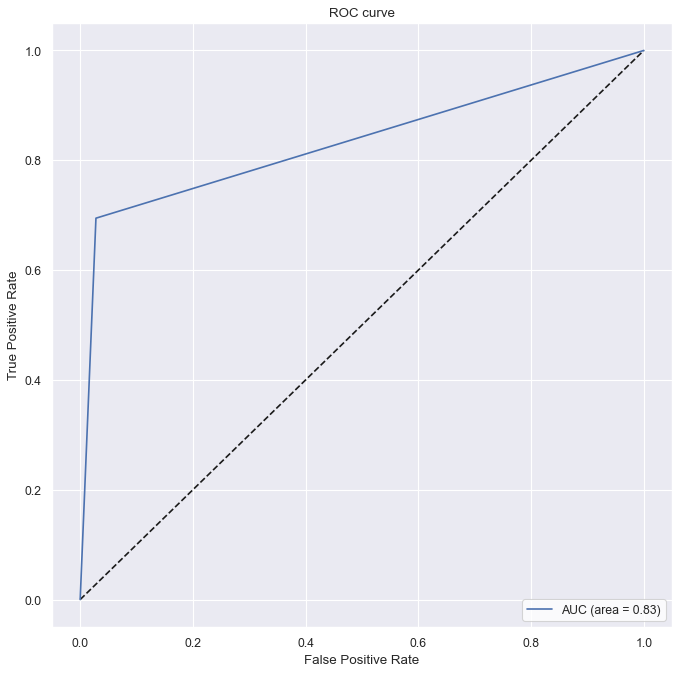

***TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST******TEST***
********************
Length of X set: 3218
Length of Y set: 3218
********************
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1609
           1       0.94      0.70      0.80      1609

    accuracy                           0.83      3218
   macro avg       0.85      0.83      0.82      3218
weighted avg       0.85      0.83      0.82      3218

********************


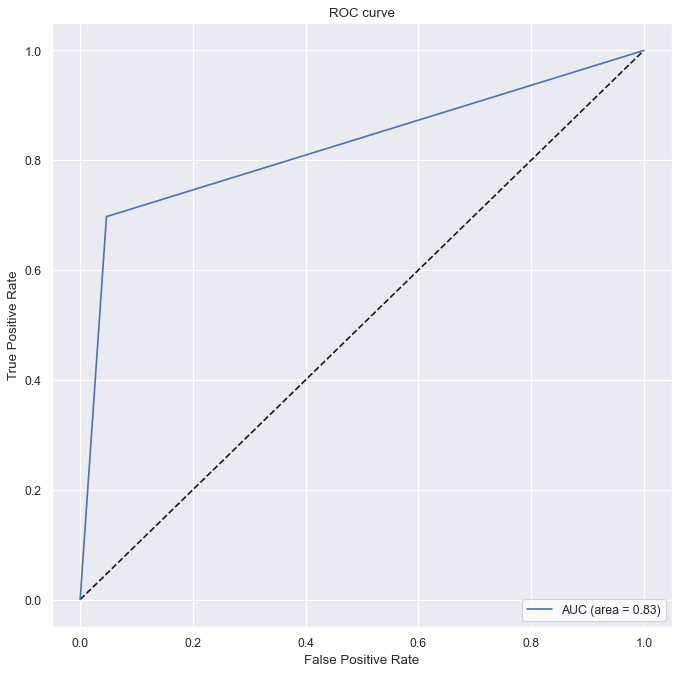

In [129]:
print('***TRAIN***'*10)
# Using the function to evaluavte the model with test-set
predict_evaluate(x_train_standardized_sm, y_train_sm, ANN_model_sm)

print('***TEST***'*10)
# Using the function to evaluavte the model with test-set
predict_evaluate(x_test_standardized_sm, y_test_sm, ANN_model_sm)

### Key Take-Aways

    1. ANN model and also Logistic Regression, Support Vector Machine, K-nearest neighbors, Naive Bayes, Decision Tree, Random Forest and XGB Classifier model to make predictions are built.
    2. Random Forest performs seems to perform better for the case study.
    3. SMOTE technique is used to overcome the bias in target class. 
    4. Improvement in perfomace of ANN model can be seen after using SMOTE.